In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sp500 = pd.read_csv("^GSPC_2000~2018.csv")
sp500.index = sp500.Date.map(lambda x : pd.Timestamp(x))
del sp500['Date']
del sp500['Adj Close']
sp500.Volume = sp500.Volume / 1e9

In [3]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-12-04,1315.180054,1332.060059,1310.229980,1324.969971,1.1030
2000-12-05,1324.969971,1376.560059,1324.969971,1376.540039,0.9003
2000-12-06,1376.540039,1376.540039,1346.150024,1351.459961,1.3993
2000-12-07,1351.459961,1353.500000,1339.260010,1343.550049,1.1280
2000-12-08,1343.550049,1380.329956,1343.550049,1369.890015,1.3583


# Adding 12 Technical Indicators

### Moving Average

In [4]:
sp500['close_ma_10'] = sp500.Close.rolling(10).mean()
sp500['close_ma_50'] = sp500.Close.rolling(50).mean()

### Rate of Change (RoC)

In [5]:
sp500['roc_1'] = sp500.Close.pct_change(periods=1)
sp500['roc_2'] = sp500.Close.pct_change(periods=2)

### RSI

In [6]:
U = np.where(sp500.Close.diff(1) > 0, sp500.Close.diff(1), 0)
D = np.where(sp500.Close.diff(1) < 0, sp500.Close.diff(1)*(-1), 0)

In [7]:
m_N = 10
AU = pd.DataFrame(U).rolling(window=m_N, min_periods=m_N).mean()
AD = pd.DataFrame(D).rolling(window=m_N, min_periods=m_N).mean()

In [8]:
RSI = AU.div(AD+AU)*100

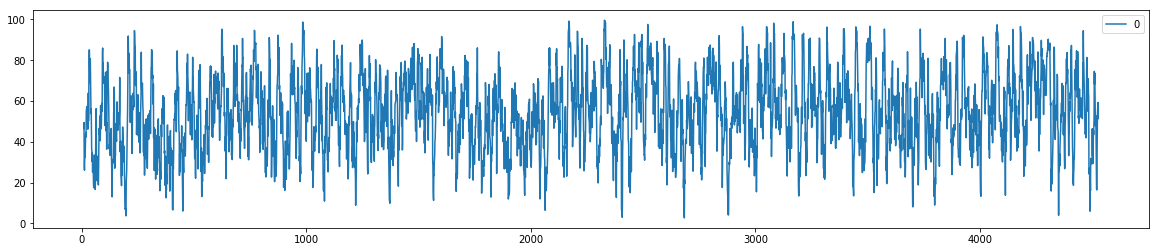

In [9]:
RSI.plot(figsize=(20,4))

In [10]:
sp500['rsi_10'] = RSI.values

### Volatility

In [11]:
sp500['his_vol_10'] = sp500["roc_1"].rolling(window = 10).std()*(252**0.5)

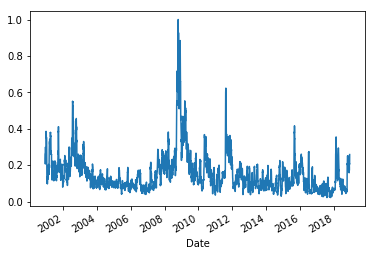

In [12]:
sp500['his_vol_10'].plot()

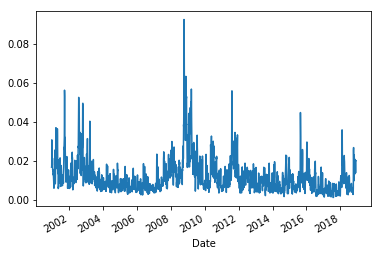

In [13]:
# CV
(sp500.Close.rolling(10).std() / sp500.Close.rolling(10).mean()).plot()

### Williams%R

In [14]:
n = 14
W_R = -100 * ((sp500.High.rolling(n).max() - sp500.Close) / 
   (sp500.High.rolling(n).max() - sp500.Low.rolling(n).min()))

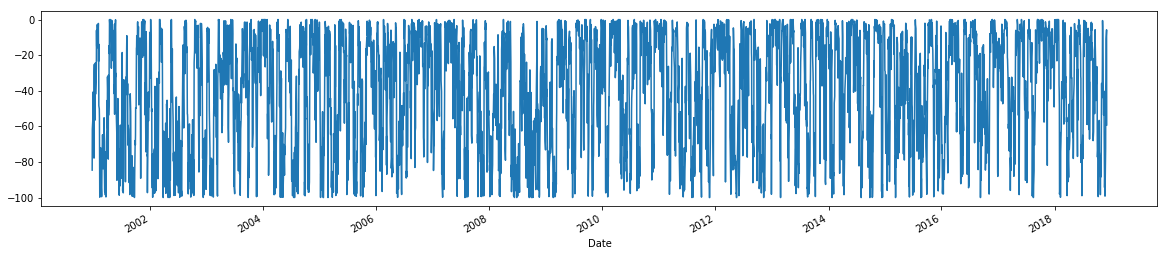

In [15]:
W_R.plot(figsize=(20,4))

In [16]:
sp500['w_r'] = W_R

### Stochastic Oscillator

In [17]:
n = 14
percent_K = 100 * ((sp500.Close - sp500.Low.rolling(n).min()) / 
   (sp500.High.rolling(n).max() - sp500.Low.rolling(n).min()))

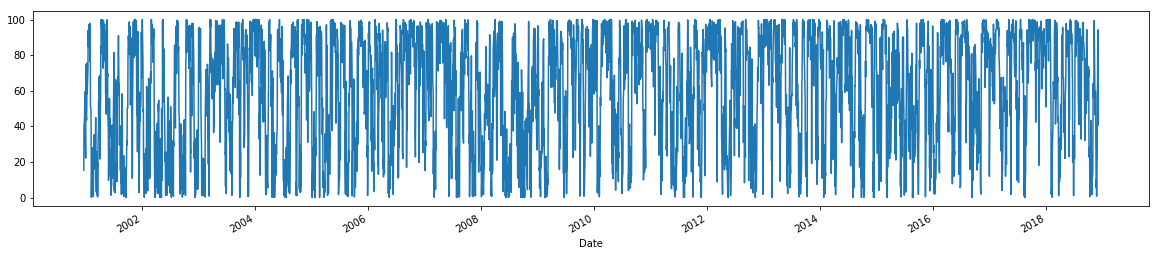

In [18]:
percent_K.plot(figsize=(20,4))

In [19]:
sto_slowD = percent_K.rolling(3).mean().rolling(3).mean()

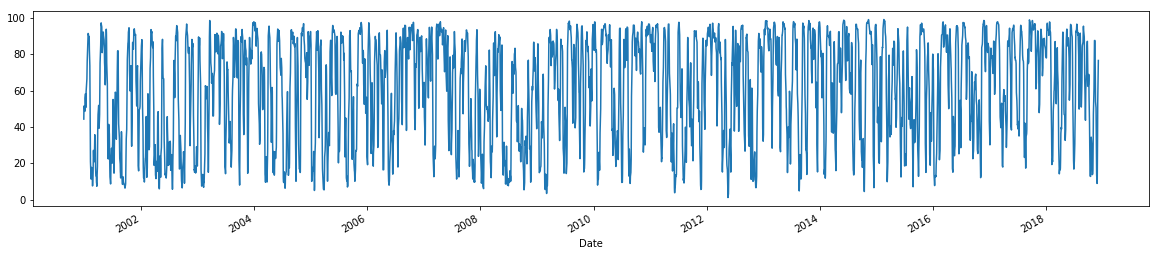

In [20]:
sto_slowD.plot(figsize=(20,4))

In [21]:
sp500['sto_slowD'] = sto_slowD

### CCI (Commodity Channel Index)
- 계산 검증 필요

In [22]:
TP = (sp500.Close + sp500.Low + sp500.High) / 3

In [23]:
window = 20
dataX = []
for i in range(len(TP) - window+1):
    a = TP.values[i:(i+window)]
    dataX.append(a)
dataMean = [i.mean() for i in dataX]
AVEDEV = [abs(x - mean).mean() for x, mean 
          in zip(dataX, dataMean)]
for i in range(window-1):
    AVEDEV.insert(0,np.nan)
AVEDEV = pd.Series(AVEDEV, index = TP.index)

In [24]:
CCI = (TP - TP.rolling(20).mean()) / (0.015 * AVEDEV)

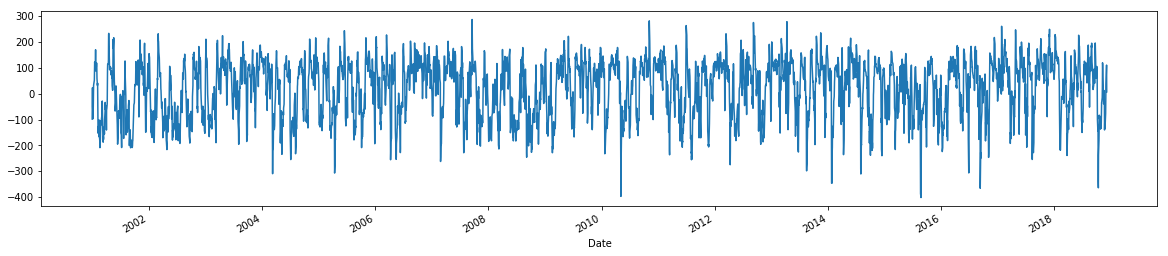

In [25]:
CCI.plot(figsize=(20,4))

In [26]:
sp500['cci'] = CCI

### Disparity Index

In [27]:
DI5 = 100 * ((sp500.Close - sp500.Close.rolling(5).mean()) / 
            sp500.Close.rolling(5).mean())
DI10 = 100 * ((sp500.Close - sp500.Close.rolling(10).mean()) / 
            sp500.Close.rolling(10).mean())

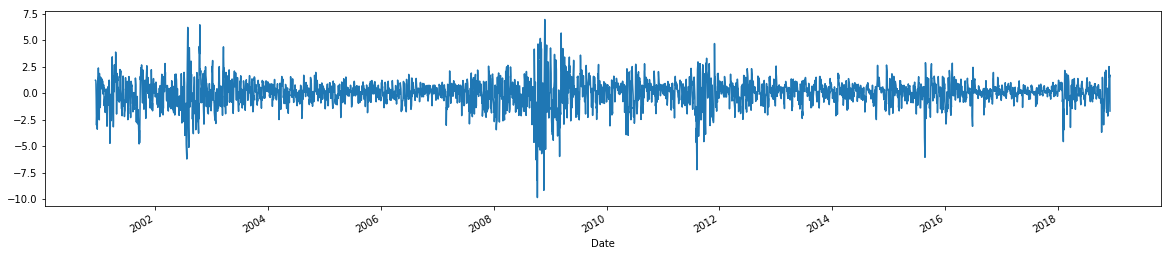

In [28]:
DI5.plot(figsize=(20,4))

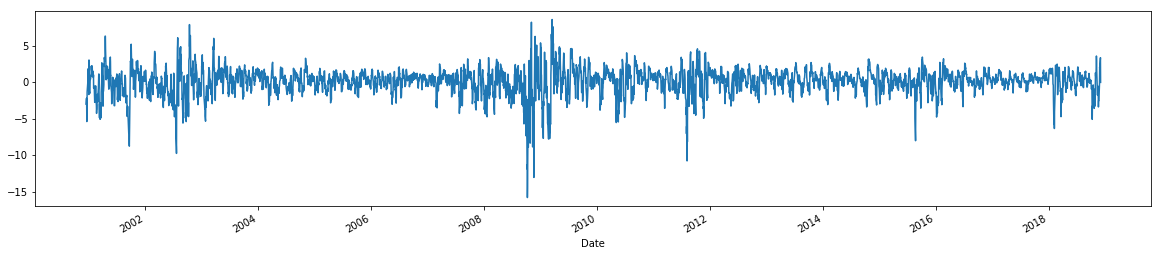

In [29]:
DI10.plot(figsize=(20,4))

In [30]:
sp500['di5'] = DI5
sp500['di10'] = DI10

### Volume Price Trend

In [31]:
VPT = pd.Series(index=sp500.index)
VPT.iloc[0] = 0
for n in range(1, len(VPT)):
    VPT.iloc[n] = VPT.iloc[n-1] + ((sp500.Close.diff(1) / sp500.Close) * sp500.Volume).iloc[n]

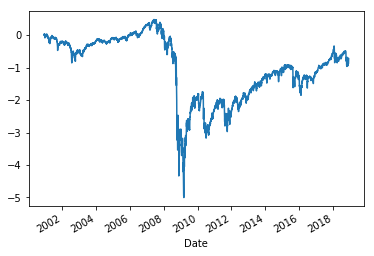

In [32]:
VPT.plot()

In [33]:
sp500['vpt'] = VPT

# DATA

In [34]:
sp500 = sp500.dropna()

### Generate Y

In [35]:
sp500_label = pd.DataFrame(index = sp500.index)
for shift in [i for i in range(1, 20)]:
    sp500_label['sh{}_Y1'.format(shift)] = np.log(sp500.Close.shift(-1*shift) / sp500.Close)

In [36]:
sp500_label.head()

,sh1_Y1,sh2_Y1,sh3_Y1,sh4_Y1,sh5_Y1,sh6_Y1,sh7_Y1,sh8_Y1,sh9_Y1,sh10_Y1,sh11_Y1,sh12_Y1,sh13_Y1,sh14_Y1,sh15_Y1,sh16_Y1,sh17_Y1,sh18_Y1,sh19_Y1
Date,,,,,,,,,,,,,,,,,,,
2001-02-14,0.008091,-0.010996,-0.028505,-0.047185,-0.049139,-0.054710,-0.037371,-0.045061,-0.059473,-0.058433,-0.064129,-0.058288,-0.048357,-0.041925,-0.039670,-0.064745,-0.108886,-0.094166,-0.120348
2001-02-15,-0.019086,-0.036595,-0.055276,-0.057230,-0.062801,-0.045462,-0.053151,-0.067564,-0.066524,-0.072220,-0.066379,-0.056448,-0.050016,-0.047760,-0.072836,-0.116977,-0.102257,-0.128439,-0.122585
2001-02-16,-0.017509,-0.036190,-0.038144,-0.043714,-0.026376,-0.034065,-0.048478,-0.047438,-0.053134,-0.047293,-0.037362,-0.030930,-0.028674,-0.053750,-0.097890,-0.083171,-0.109353,-0.103499,-0.123318
2001-02-20,-0.018681,-0.020635,-0.026206,-0.008867,-0.016556,-0.030969,-0.029929,-0.035625,-0.029784,-0.019853,-0.013421,-0.011165,-0.036241,-0.080382,-0.065662,-0.091844,-0.085990,-0.105809,-0.088336
2001-02-21,-0.001954,-0.007525,0.009814,0.002125,-0.012288,-0.011248,-0.016944,-0.011103,-0.001172,0.005260,0.007516,-0.017560,-0.061701,-0.046981,-0.073163,-0.067309,-0.087128,-0.069655,-0.094027


In [37]:
sp500_data = sp500[sp500.columns[5:]]

In [38]:
sp500_data.head()

,close_ma_10,close_ma_50,roc_1,roc_2,rsi_10,his_vol_10,w_r,sto_slowD,cci,di5,di10,vpt
Date,,,,,,,,,,,,
2001-02-14,1338.272022,1334.690007,-0.002184,-0.010817,26.325792,0.142072,-85.759606,14.958118,-166.020601,-0.494833,-1.670212,-0.017362
2001-02-15,1333.586023,1334.722808,0.008124,0.005922,28.508565,0.147404,-72.167823,17.142581,-101.479840,0.403393,-0.523104,-0.008065
2001-02-16,1328.792029,1333.222607,-0.018905,-0.010935,28.228929,0.151346,-90.741789,17.709036,-151.232956,-1.297100,-2.051638,-0.032291
2001-02-20,1321.255017,1331.772207,-0.017357,-0.035934,20.524028,0.159893,-99.523492,15.887592,-182.319597,-2.248622,-3.202643,-0.051936
2001-02-21,1311.556018,1330.006606,-0.018507,-0.035543,17.555359,0.169981,-98.287627,11.149419,-208.692825,-3.116880,-4.291544,-0.074724


In [39]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()

In [40]:
y_li = ['sh1_Y1', 'sh5_Y1', 'sh10_Y1']

In [41]:
import time
look_back = 100
result = pd.DataFrame(columns = sp500_label.columns,
                      index = sp500_label.index)
trial = 0
start = time.time()
const = 10
loop_size = (len(sp500_data) - look_back - 1 - const) * len(y_li)
for i in range(len(sp500_data) - look_back - 1 -const):
    for y in y_li:
        semi_start = time.time()
        try:
            k = int(y[2:4])
        except:
            k = int(y[2])
            
        xgb_reg = XGBRegressor()
        xgb_reg.fit(sp500_data.iloc[i:i+look_back],
                    sp500_label.iloc[i:i+look_back][y])
        pred = xgb_reg.predict(
            sp500_data.iloc[i+look_back+k:i+look_back+k+1])
        result.iloc[look_back+i+k-1][y] = pred[0]
        del xgb_reg
        trial += 1
        semi_elapse = time.time() - semi_start
        print('Done {} / {}'.format(trial, loop_size))
        print('\t {:.4f} sec'.format(semi_elapse))
elapse = time.time() - start

Done 1 / 13107
	 0.0369 sec
Done 2 / 13107
	 0.0280 sec
Done 3 / 13107
	 0.0299 sec
Done 4 / 13107
	 0.0279 sec
Done 5 / 13107
	 0.0329 sec
Done 6 / 13107
	 0.0509 sec
Done 7 / 13107
	 0.0249 sec
Done 8 / 13107
	 0.0379 sec
Done 9 / 13107
	 0.0329 sec
Done 10 / 13107
	 0.0280 sec
Done 11 / 13107
	 0.0279 sec
Done 12 / 13107
	 0.0250 sec
Done 13 / 13107
	 0.0219 sec
Done 14 / 13107
	 0.0249 sec
Done 15 / 13107
	 0.0240 sec
Done 16 / 13107
	 0.0239 sec
Done 17 / 13107
	 0.0309 sec
Done 18 / 13107
	 0.0279 sec
Done 19 / 13107
	 0.0229 sec
Done 20 / 13107
	 0.0229 sec
Done 21 / 13107
	 0.0239 sec
Done 22 / 13107
	 0.0229 sec
Done 23 / 13107
	 0.0259 sec
Done 24 / 13107
	 0.0239 sec
Done 25 / 13107
	 0.0239 sec
Done 26 / 13107
	 0.0259 sec
Done 27 / 13107
	 0.0259 sec
Done 28 / 13107
	 0.0219 sec
Done 29 / 13107
	 0.0239 sec
Done 30 / 13107
	 0.0239 sec
Done 31 / 13107
	 0.0229 sec
Done 32 / 13107
	 0.0239 sec
Done 33 / 13107
	 0.0259 sec
Done 34 / 13107
	 0.0309 sec
Done 35 / 13107
	 0.024

Done 282 / 13107
	 0.0229 sec
Done 283 / 13107
	 0.0230 sec
Done 284 / 13107
	 0.0269 sec
Done 285 / 13107
	 0.0249 sec
Done 286 / 13107
	 0.0219 sec
Done 287 / 13107
	 0.0229 sec
Done 288 / 13107
	 0.0240 sec
Done 289 / 13107
	 0.0229 sec
Done 290 / 13107
	 0.0289 sec
Done 291 / 13107
	 0.0259 sec
Done 292 / 13107
	 0.0299 sec
Done 293 / 13107
	 0.0259 sec
Done 294 / 13107
	 0.0229 sec
Done 295 / 13107
	 0.0229 sec
Done 296 / 13107
	 0.0239 sec
Done 297 / 13107
	 0.0239 sec
Done 298 / 13107
	 0.0239 sec
Done 299 / 13107
	 0.0280 sec
Done 300 / 13107
	 0.0229 sec
Done 301 / 13107
	 0.0220 sec
Done 302 / 13107
	 0.0229 sec
Done 303 / 13107
	 0.0239 sec
Done 304 / 13107
	 0.0219 sec
Done 305 / 13107
	 0.0230 sec
Done 306 / 13107
	 0.0249 sec
Done 307 / 13107
	 0.0269 sec
Done 308 / 13107
	 0.0279 sec
Done 309 / 13107
	 0.0239 sec
Done 310 / 13107
	 0.0219 sec
Done 311 / 13107
	 0.0239 sec
Done 312 / 13107
	 0.0229 sec
Done 313 / 13107
	 0.0219 sec
Done 314 / 13107
	 0.0229 sec
Done 315 /

Done 557 / 13107
	 0.0219 sec
Done 558 / 13107
	 0.0249 sec
Done 559 / 13107
	 0.0259 sec
Done 560 / 13107
	 0.0249 sec
Done 561 / 13107
	 0.0229 sec
Done 562 / 13107
	 0.0209 sec
Done 563 / 13107
	 0.0219 sec
Done 564 / 13107
	 0.0229 sec
Done 565 / 13107
	 0.0219 sec
Done 566 / 13107
	 0.0249 sec
Done 567 / 13107
	 0.0279 sec
Done 568 / 13107
	 0.0229 sec
Done 569 / 13107
	 0.0239 sec
Done 570 / 13107
	 0.0269 sec
Done 571 / 13107
	 0.0219 sec
Done 572 / 13107
	 0.0229 sec
Done 573 / 13107
	 0.0229 sec
Done 574 / 13107
	 0.0219 sec
Done 575 / 13107
	 0.0239 sec
Done 576 / 13107
	 0.0239 sec
Done 577 / 13107
	 0.0239 sec
Done 578 / 13107
	 0.0229 sec
Done 579 / 13107
	 0.0239 sec
Done 580 / 13107
	 0.0219 sec
Done 581 / 13107
	 0.0239 sec
Done 582 / 13107
	 0.0229 sec
Done 583 / 13107
	 0.0229 sec
Done 584 / 13107
	 0.0270 sec
Done 585 / 13107
	 0.0259 sec
Done 586 / 13107
	 0.0219 sec
Done 587 / 13107
	 0.0239 sec
Done 588 / 13107
	 0.0260 sec
Done 589 / 13107
	 0.0229 sec
Done 590 /

Done 833 / 13107
	 0.0259 sec
Done 834 / 13107
	 0.0279 sec
Done 835 / 13107
	 0.0229 sec
Done 836 / 13107
	 0.0249 sec
Done 837 / 13107
	 0.0239 sec
Done 838 / 13107
	 0.0219 sec
Done 839 / 13107
	 0.0239 sec
Done 840 / 13107
	 0.0279 sec
Done 841 / 13107
	 0.0249 sec
Done 842 / 13107
	 0.0279 sec
Done 843 / 13107
	 0.0239 sec
Done 844 / 13107
	 0.0209 sec
Done 845 / 13107
	 0.0229 sec
Done 846 / 13107
	 0.0239 sec
Done 847 / 13107
	 0.0219 sec
Done 848 / 13107
	 0.0229 sec
Done 849 / 13107
	 0.0269 sec
Done 850 / 13107
	 0.0249 sec
Done 851 / 13107
	 0.0229 sec
Done 852 / 13107
	 0.0239 sec
Done 853 / 13107
	 0.0219 sec
Done 854 / 13107
	 0.0229 sec
Done 855 / 13107
	 0.0259 sec
Done 856 / 13107
	 0.0219 sec
Done 857 / 13107
	 0.0249 sec
Done 858 / 13107
	 0.0259 sec
Done 859 / 13107
	 0.0229 sec
Done 860 / 13107
	 0.0239 sec
Done 861 / 13107
	 0.0239 sec
Done 862 / 13107
	 0.0219 sec
Done 863 / 13107
	 0.0229 sec
Done 864 / 13107
	 0.0229 sec
Done 865 / 13107
	 0.0229 sec
Done 866 /

Done 1111 / 13107
	 0.0239 sec
Done 1112 / 13107
	 0.0259 sec
Done 1113 / 13107
	 0.0239 sec
Done 1114 / 13107
	 0.0229 sec
Done 1115 / 13107
	 0.0229 sec
Done 1116 / 13107
	 0.0239 sec
Done 1117 / 13107
	 0.0229 sec
Done 1118 / 13107
	 0.0229 sec
Done 1119 / 13107
	 0.0239 sec
Done 1120 / 13107
	 0.0260 sec
Done 1121 / 13107
	 0.0279 sec
Done 1122 / 13107
	 0.0239 sec
Done 1123 / 13107
	 0.0219 sec
Done 1124 / 13107
	 0.0239 sec
Done 1125 / 13107
	 0.0239 sec
Done 1126 / 13107
	 0.0229 sec
Done 1127 / 13107
	 0.0229 sec
Done 1128 / 13107
	 0.0259 sec
Done 1129 / 13107
	 0.0259 sec
Done 1130 / 13107
	 0.0269 sec
Done 1131 / 13107
	 0.0259 sec
Done 1132 / 13107
	 0.0219 sec
Done 1133 / 13107
	 0.0239 sec
Done 1134 / 13107
	 0.0239 sec
Done 1135 / 13107
	 0.0219 sec
Done 1136 / 13107
	 0.0229 sec
Done 1137 / 13107
	 0.0259 sec
Done 1138 / 13107
	 0.0259 sec
Done 1139 / 13107
	 0.0249 sec
Done 1140 / 13107
	 0.0309 sec
Done 1141 / 13107
	 0.0219 sec
Done 1142 / 13107
	 0.0229 sec
Done 114

Done 1384 / 13107
	 0.0239 sec
Done 1385 / 13107
	 0.0259 sec
Done 1386 / 13107
	 0.0249 sec
Done 1387 / 13107
	 0.0219 sec
Done 1388 / 13107
	 0.0229 sec
Done 1389 / 13107
	 0.0239 sec
Done 1390 / 13107
	 0.0219 sec
Done 1391 / 13107
	 0.0270 sec
Done 1392 / 13107
	 0.0229 sec
Done 1393 / 13107
	 0.0230 sec
Done 1394 / 13107
	 0.0269 sec
Done 1395 / 13107
	 0.0239 sec
Done 1396 / 13107
	 0.0219 sec
Done 1397 / 13107
	 0.0229 sec
Done 1398 / 13107
	 0.0219 sec
Done 1399 / 13107
	 0.0219 sec
Done 1400 / 13107
	 0.0229 sec
Done 1401 / 13107
	 0.0229 sec
Done 1402 / 13107
	 0.0219 sec
Done 1403 / 13107
	 0.0259 sec
Done 1404 / 13107
	 0.0229 sec
Done 1405 / 13107
	 0.0229 sec
Done 1406 / 13107
	 0.0219 sec
Done 1407 / 13107
	 0.0239 sec
Done 1408 / 13107
	 0.0219 sec
Done 1409 / 13107
	 0.0229 sec
Done 1410 / 13107
	 0.0309 sec
Done 1411 / 13107
	 0.0239 sec
Done 1412 / 13107
	 0.0229 sec
Done 1413 / 13107
	 0.0249 sec
Done 1414 / 13107
	 0.0219 sec
Done 1415 / 13107
	 0.0229 sec
Done 141

Done 1649 / 13107
	 0.0240 sec
Done 1650 / 13107
	 0.0249 sec
Done 1651 / 13107
	 0.0219 sec
Done 1652 / 13107
	 0.0229 sec
Done 1653 / 13107
	 0.0229 sec
Done 1654 / 13107
	 0.0219 sec
Done 1655 / 13107
	 0.0249 sec
Done 1656 / 13107
	 0.0229 sec
Done 1657 / 13107
	 0.0209 sec
Done 1658 / 13107
	 0.0249 sec
Done 1659 / 13107
	 0.0249 sec
Done 1660 / 13107
	 0.0209 sec
Done 1661 / 13107
	 0.0229 sec
Done 1662 / 13107
	 0.0219 sec
Done 1663 / 13107
	 0.0219 sec
Done 1664 / 13107
	 0.0219 sec
Done 1665 / 13107
	 0.0239 sec
Done 1666 / 13107
	 0.0220 sec
Done 1667 / 13107
	 0.0229 sec
Done 1668 / 13107
	 0.0249 sec
Done 1669 / 13107
	 0.0229 sec
Done 1670 / 13107
	 0.0219 sec
Done 1671 / 13107
	 0.0219 sec
Done 1672 / 13107
	 0.0219 sec
Done 1673 / 13107
	 0.0219 sec
Done 1674 / 13107
	 0.0259 sec
Done 1675 / 13107
	 0.0219 sec
Done 1676 / 13107
	 0.0219 sec
Done 1677 / 13107
	 0.0259 sec
Done 1678 / 13107
	 0.0229 sec
Done 1679 / 13107
	 0.0219 sec
Done 1680 / 13107
	 0.0229 sec
Done 168

Done 1918 / 13107
	 0.0239 sec
Done 1919 / 13107
	 0.0259 sec
Done 1920 / 13107
	 0.0229 sec
Done 1921 / 13107
	 0.0209 sec
Done 1922 / 13107
	 0.0219 sec
Done 1923 / 13107
	 0.0229 sec
Done 1924 / 13107
	 0.0239 sec
Done 1925 / 13107
	 0.0229 sec
Done 1926 / 13107
	 0.0239 sec
Done 1927 / 13107
	 0.0229 sec
Done 1928 / 13107
	 0.0229 sec
Done 1929 / 13107
	 0.0229 sec
Done 1930 / 13107
	 0.0209 sec
Done 1931 / 13107
	 0.0219 sec
Done 1932 / 13107
	 0.0219 sec
Done 1933 / 13107
	 0.0209 sec
Done 1934 / 13107
	 0.0219 sec
Done 1935 / 13107
	 0.0219 sec
Done 1936 / 13107
	 0.0209 sec
Done 1937 / 13107
	 0.0229 sec
Done 1938 / 13107
	 0.0249 sec
Done 1939 / 13107
	 0.0209 sec
Done 1940 / 13107
	 0.0219 sec
Done 1941 / 13107
	 0.0219 sec
Done 1942 / 13107
	 0.0209 sec
Done 1943 / 13107
	 0.0229 sec
Done 1944 / 13107
	 0.0219 sec
Done 1945 / 13107
	 0.0210 sec
Done 1946 / 13107
	 0.0239 sec
Done 1947 / 13107
	 0.0239 sec
Done 1948 / 13107
	 0.0259 sec
Done 1949 / 13107
	 0.0219 sec
Done 195

Done 2189 / 13107
	 0.0229 sec
Done 2190 / 13107
	 0.0250 sec
Done 2191 / 13107
	 0.0209 sec
Done 2192 / 13107
	 0.0220 sec
Done 2193 / 13107
	 0.0220 sec
Done 2194 / 13107
	 0.0219 sec
Done 2195 / 13107
	 0.0249 sec
Done 2196 / 13107
	 0.0219 sec
Done 2197 / 13107
	 0.0209 sec
Done 2198 / 13107
	 0.0260 sec
Done 2199 / 13107
	 0.0250 sec
Done 2200 / 13107
	 0.0219 sec
Done 2201 / 13107
	 0.0219 sec
Done 2202 / 13107
	 0.0229 sec
Done 2203 / 13107
	 0.0209 sec
Done 2204 / 13107
	 0.0229 sec
Done 2205 / 13107
	 0.0229 sec
Done 2206 / 13107
	 0.0209 sec
Done 2207 / 13107
	 0.0229 sec
Done 2208 / 13107
	 0.0259 sec
Done 2209 / 13107
	 0.0209 sec
Done 2210 / 13107
	 0.0219 sec
Done 2211 / 13107
	 0.0259 sec
Done 2212 / 13107
	 0.0219 sec
Done 2213 / 13107
	 0.0219 sec
Done 2214 / 13107
	 0.0229 sec
Done 2215 / 13107
	 0.0209 sec
Done 2216 / 13107
	 0.0259 sec
Done 2217 / 13107
	 0.0230 sec
Done 2218 / 13107
	 0.0209 sec
Done 2219 / 13107
	 0.0220 sec
Done 2220 / 13107
	 0.0219 sec
Done 222

Done 2455 / 13107
	 0.0219 sec
Done 2456 / 13107
	 0.0239 sec
Done 2457 / 13107
	 0.0229 sec
Done 2458 / 13107
	 0.0209 sec
Done 2459 / 13107
	 0.0220 sec
Done 2460 / 13107
	 0.0229 sec
Done 2461 / 13107
	 0.0209 sec
Done 2462 / 13107
	 0.0219 sec
Done 2463 / 13107
	 0.0219 sec
Done 2464 / 13107
	 0.0219 sec
Done 2465 / 13107
	 0.0269 sec
Done 2466 / 13107
	 0.0229 sec
Done 2467 / 13107
	 0.0209 sec
Done 2468 / 13107
	 0.0229 sec
Done 2469 / 13107
	 0.0229 sec
Done 2470 / 13107
	 0.0209 sec
Done 2471 / 13107
	 0.0229 sec
Done 2472 / 13107
	 0.0269 sec
Done 2473 / 13107
	 0.0229 sec
Done 2474 / 13107
	 0.0239 sec
Done 2475 / 13107
	 0.0229 sec
Done 2476 / 13107
	 0.0199 sec
Done 2477 / 13107
	 0.0219 sec
Done 2478 / 13107
	 0.0229 sec
Done 2479 / 13107
	 0.0209 sec
Done 2480 / 13107
	 0.0229 sec
Done 2481 / 13107
	 0.0249 sec
Done 2482 / 13107
	 0.0249 sec
Done 2483 / 13107
	 0.0229 sec
Done 2484 / 13107
	 0.0239 sec
Done 2485 / 13107
	 0.0209 sec
Done 2486 / 13107
	 0.0270 sec
Done 248

Done 2728 / 13107
	 0.0229 sec
Done 2729 / 13107
	 0.0289 sec
Done 2730 / 13107
	 0.0239 sec
Done 2731 / 13107
	 0.0199 sec
Done 2732 / 13107
	 0.0219 sec
Done 2733 / 13107
	 0.0239 sec
Done 2734 / 13107
	 0.0209 sec
Done 2735 / 13107
	 0.0209 sec
Done 2736 / 13107
	 0.0219 sec
Done 2737 / 13107
	 0.0269 sec
Done 2738 / 13107
	 0.0229 sec
Done 2739 / 13107
	 0.0229 sec
Done 2740 / 13107
	 0.0219 sec
Done 2741 / 13107
	 0.0229 sec
Done 2742 / 13107
	 0.0229 sec
Done 2743 / 13107
	 0.0209 sec
Done 2744 / 13107
	 0.0229 sec
Done 2745 / 13107
	 0.0229 sec
Done 2746 / 13107
	 0.0219 sec
Done 2747 / 13107
	 0.0249 sec
Done 2748 / 13107
	 0.0219 sec
Done 2749 / 13107
	 0.0219 sec
Done 2750 / 13107
	 0.0219 sec
Done 2751 / 13107
	 0.0239 sec
Done 2752 / 13107
	 0.0220 sec
Done 2753 / 13107
	 0.0219 sec
Done 2754 / 13107
	 0.0219 sec
Done 2755 / 13107
	 0.0239 sec
Done 2756 / 13107
	 0.0259 sec
Done 2757 / 13107
	 0.0219 sec
Done 2758 / 13107
	 0.0209 sec
Done 2759 / 13107
	 0.0209 sec
Done 276

Done 2993 / 13107
	 0.0230 sec
Done 2994 / 13107
	 0.0259 sec
Done 2995 / 13107
	 0.0219 sec
Done 2996 / 13107
	 0.0219 sec
Done 2997 / 13107
	 0.0229 sec
Done 2998 / 13107
	 0.0209 sec
Done 2999 / 13107
	 0.0209 sec
Done 3000 / 13107
	 0.0229 sec
Done 3001 / 13107
	 0.0219 sec
Done 3002 / 13107
	 0.0239 sec
Done 3003 / 13107
	 0.0269 sec
Done 3004 / 13107
	 0.0239 sec
Done 3005 / 13107
	 0.0259 sec
Done 3006 / 13107
	 0.0230 sec
Done 3007 / 13107
	 0.0219 sec
Done 3008 / 13107
	 0.0229 sec
Done 3009 / 13107
	 0.0219 sec
Done 3010 / 13107
	 0.0209 sec
Done 3011 / 13107
	 0.0239 sec
Done 3012 / 13107
	 0.0259 sec
Done 3013 / 13107
	 0.0209 sec
Done 3014 / 13107
	 0.0219 sec
Done 3015 / 13107
	 0.0229 sec
Done 3016 / 13107
	 0.0210 sec
Done 3017 / 13107
	 0.0219 sec
Done 3018 / 13107
	 0.0239 sec
Done 3019 / 13107
	 0.0209 sec
Done 3020 / 13107
	 0.0219 sec
Done 3021 / 13107
	 0.0239 sec
Done 3022 / 13107
	 0.0249 sec
Done 3023 / 13107
	 0.0219 sec
Done 3024 / 13107
	 0.0219 sec
Done 302

Done 3262 / 13107
	 0.0229 sec
Done 3263 / 13107
	 0.0249 sec
Done 3264 / 13107
	 0.0229 sec
Done 3265 / 13107
	 0.0219 sec
Done 3266 / 13107
	 0.0229 sec
Done 3267 / 13107
	 0.0219 sec
Done 3268 / 13107
	 0.0219 sec
Done 3269 / 13107
	 0.0239 sec
Done 3270 / 13107
	 0.0220 sec
Done 3271 / 13107
	 0.0230 sec
Done 3272 / 13107
	 0.0259 sec
Done 3273 / 13107
	 0.0219 sec
Done 3274 / 13107
	 0.0249 sec
Done 3275 / 13107
	 0.0249 sec
Done 3276 / 13107
	 0.0219 sec
Done 3277 / 13107
	 0.0209 sec
Done 3278 / 13107
	 0.0209 sec
Done 3279 / 13107
	 0.0219 sec
Done 3280 / 13107
	 0.0229 sec
Done 3281 / 13107
	 0.0259 sec
Done 3282 / 13107
	 0.0219 sec
Done 3283 / 13107
	 0.0209 sec
Done 3284 / 13107
	 0.0219 sec
Done 3285 / 13107
	 0.0229 sec
Done 3286 / 13107
	 0.0219 sec
Done 3287 / 13107
	 0.0219 sec
Done 3288 / 13107
	 0.0229 sec
Done 3289 / 13107
	 0.0239 sec
Done 3290 / 13107
	 0.0280 sec
Done 3291 / 13107
	 0.0219 sec
Done 3292 / 13107
	 0.0219 sec
Done 3293 / 13107
	 0.0219 sec
Done 329

Done 3531 / 13107
	 0.0389 sec
Done 3532 / 13107
	 0.0249 sec
Done 3533 / 13107
	 0.0239 sec
Done 3534 / 13107
	 0.0249 sec
Done 3535 / 13107
	 0.0219 sec
Done 3536 / 13107
	 0.0289 sec
Done 3537 / 13107
	 0.0249 sec
Done 3538 / 13107
	 0.0299 sec
Done 3539 / 13107
	 0.0399 sec
Done 3540 / 13107
	 0.0349 sec
Done 3541 / 13107
	 0.0309 sec
Done 3542 / 13107
	 0.0249 sec
Done 3543 / 13107
	 0.0289 sec
Done 3544 / 13107
	 0.0219 sec
Done 3545 / 13107
	 0.0280 sec
Done 3546 / 13107
	 0.0329 sec
Done 3547 / 13107
	 0.0269 sec
Done 3548 / 13107
	 0.0289 sec
Done 3549 / 13107
	 0.0309 sec
Done 3550 / 13107
	 0.0229 sec
Done 3551 / 13107
	 0.0259 sec
Done 3552 / 13107
	 0.0219 sec
Done 3553 / 13107
	 0.0239 sec
Done 3554 / 13107
	 0.0240 sec
Done 3555 / 13107
	 0.0219 sec
Done 3556 / 13107
	 0.0209 sec
Done 3557 / 13107
	 0.0229 sec
Done 3558 / 13107
	 0.0219 sec
Done 3559 / 13107
	 0.0209 sec
Done 3560 / 13107
	 0.0219 sec
Done 3561 / 13107
	 0.0279 sec
Done 3562 / 13107
	 0.0289 sec
Done 356

Done 3804 / 13107
	 0.0239 sec
Done 3805 / 13107
	 0.0259 sec
Done 3806 / 13107
	 0.0219 sec
Done 3807 / 13107
	 0.0229 sec
Done 3808 / 13107
	 0.0209 sec
Done 3809 / 13107
	 0.0219 sec
Done 3810 / 13107
	 0.0229 sec
Done 3811 / 13107
	 0.0209 sec
Done 3812 / 13107
	 0.0219 sec
Done 3813 / 13107
	 0.0239 sec
Done 3814 / 13107
	 0.0250 sec
Done 3815 / 13107
	 0.0229 sec
Done 3816 / 13107
	 0.0219 sec
Done 3817 / 13107
	 0.0209 sec
Done 3818 / 13107
	 0.0229 sec
Done 3819 / 13107
	 0.0219 sec
Done 3820 / 13107
	 0.0199 sec
Done 3821 / 13107
	 0.0219 sec
Done 3822 / 13107
	 0.0239 sec
Done 3823 / 13107
	 0.0230 sec
Done 3824 / 13107
	 0.0229 sec
Done 3825 / 13107
	 0.0239 sec
Done 3826 / 13107
	 0.0209 sec
Done 3827 / 13107
	 0.0219 sec
Done 3828 / 13107
	 0.0239 sec
Done 3829 / 13107
	 0.0239 sec
Done 3830 / 13107
	 0.0220 sec
Done 3831 / 13107
	 0.0259 sec
Done 3832 / 13107
	 0.0240 sec
Done 3833 / 13107
	 0.0219 sec
Done 3834 / 13107
	 0.0219 sec
Done 3835 / 13107
	 0.0210 sec
Done 383

Done 4071 / 13107
	 0.0210 sec
Done 4072 / 13107
	 0.0209 sec
Done 4073 / 13107
	 0.0249 sec
Done 4074 / 13107
	 0.0210 sec
Done 4075 / 13107
	 0.0199 sec
Done 4076 / 13107
	 0.0219 sec
Done 4077 / 13107
	 0.0209 sec
Done 4078 / 13107
	 0.0209 sec
Done 4079 / 13107
	 0.0219 sec
Done 4080 / 13107
	 0.0219 sec
Done 4081 / 13107
	 0.0239 sec
Done 4082 / 13107
	 0.0230 sec
Done 4083 / 13107
	 0.0209 sec
Done 4084 / 13107
	 0.0199 sec
Done 4085 / 13107
	 0.0220 sec
Done 4086 / 13107
	 0.0219 sec
Done 4087 / 13107
	 0.0209 sec
Done 4088 / 13107
	 0.0219 sec
Done 4089 / 13107
	 0.0289 sec
Done 4090 / 13107
	 0.0249 sec
Done 4091 / 13107
	 0.0219 sec
Done 4092 / 13107
	 0.0219 sec
Done 4093 / 13107
	 0.0209 sec
Done 4094 / 13107
	 0.0219 sec
Done 4095 / 13107
	 0.0219 sec
Done 4096 / 13107
	 0.0209 sec
Done 4097 / 13107
	 0.0230 sec
Done 4098 / 13107
	 0.0239 sec
Done 4099 / 13107
	 0.0229 sec
Done 4100 / 13107
	 0.0209 sec
Done 4101 / 13107
	 0.0219 sec
Done 4102 / 13107
	 0.0209 sec
Done 410

Done 4342 / 13107
	 0.0209 sec
Done 4343 / 13107
	 0.0259 sec
Done 4344 / 13107
	 0.0229 sec
Done 4345 / 13107
	 0.0200 sec
Done 4346 / 13107
	 0.0209 sec
Done 4347 / 13107
	 0.0219 sec
Done 4348 / 13107
	 0.0199 sec
Done 4349 / 13107
	 0.0219 sec
Done 4350 / 13107
	 0.0229 sec
Done 4351 / 13107
	 0.0199 sec
Done 4352 / 13107
	 0.0249 sec
Done 4353 / 13107
	 0.0259 sec
Done 4354 / 13107
	 0.0199 sec
Done 4355 / 13107
	 0.0219 sec
Done 4356 / 13107
	 0.0229 sec
Done 4357 / 13107
	 0.0199 sec
Done 4358 / 13107
	 0.0309 sec
Done 4359 / 13107
	 0.0239 sec
Done 4360 / 13107
	 0.0229 sec
Done 4361 / 13107
	 0.0289 sec
Done 4362 / 13107
	 0.0229 sec
Done 4363 / 13107
	 0.0209 sec
Done 4364 / 13107
	 0.0219 sec
Done 4365 / 13107
	 0.0219 sec
Done 4366 / 13107
	 0.0209 sec
Done 4367 / 13107
	 0.0219 sec
Done 4368 / 13107
	 0.0219 sec
Done 4369 / 13107
	 0.0229 sec
Done 4370 / 13107
	 0.0269 sec
Done 4371 / 13107
	 0.0229 sec
Done 4372 / 13107
	 0.0199 sec
Done 4373 / 13107
	 0.0239 sec
Done 437

Done 4611 / 13107
	 0.0240 sec
Done 4612 / 13107
	 0.0250 sec
Done 4613 / 13107
	 0.0219 sec
Done 4614 / 13107
	 0.0229 sec
Done 4615 / 13107
	 0.0219 sec
Done 4616 / 13107
	 0.0219 sec
Done 4617 / 13107
	 0.0219 sec
Done 4618 / 13107
	 0.0219 sec
Done 4619 / 13107
	 0.0219 sec
Done 4620 / 13107
	 0.0249 sec
Done 4621 / 13107
	 0.0229 sec
Done 4622 / 13107
	 0.0229 sec
Done 4623 / 13107
	 0.0229 sec
Done 4624 / 13107
	 0.0229 sec
Done 4625 / 13107
	 0.0219 sec
Done 4626 / 13107
	 0.0219 sec
Done 4627 / 13107
	 0.0219 sec
Done 4628 / 13107
	 0.0239 sec
Done 4629 / 13107
	 0.0239 sec
Done 4630 / 13107
	 0.0220 sec
Done 4631 / 13107
	 0.0229 sec
Done 4632 / 13107
	 0.0239 sec
Done 4633 / 13107
	 0.0219 sec
Done 4634 / 13107
	 0.0219 sec
Done 4635 / 13107
	 0.0229 sec
Done 4636 / 13107
	 0.0229 sec
Done 4637 / 13107
	 0.0259 sec
Done 4638 / 13107
	 0.0249 sec
Done 4639 / 13107
	 0.0229 sec
Done 4640 / 13107
	 0.0219 sec
Done 4641 / 13107
	 0.0229 sec
Done 4642 / 13107
	 0.0210 sec
Done 464

Done 4880 / 13107
	 0.0279 sec
Done 4881 / 13107
	 0.0279 sec
Done 4882 / 13107
	 0.0219 sec
Done 4883 / 13107
	 0.0229 sec
Done 4884 / 13107
	 0.0229 sec
Done 4885 / 13107
	 0.0219 sec
Done 4886 / 13107
	 0.0229 sec
Done 4887 / 13107
	 0.0229 sec
Done 4888 / 13107
	 0.0219 sec
Done 4889 / 13107
	 0.0239 sec
Done 4890 / 13107
	 0.0309 sec
Done 4891 / 13107
	 0.0240 sec
Done 4892 / 13107
	 0.0229 sec
Done 4893 / 13107
	 0.0229 sec
Done 4894 / 13107
	 0.0219 sec
Done 4895 / 13107
	 0.0229 sec
Done 4896 / 13107
	 0.0229 sec
Done 4897 / 13107
	 0.0219 sec
Done 4898 / 13107
	 0.0239 sec
Done 4899 / 13107
	 0.0269 sec
Done 4900 / 13107
	 0.0220 sec
Done 4901 / 13107
	 0.0239 sec
Done 4902 / 13107
	 0.0229 sec
Done 4903 / 13107
	 0.0219 sec
Done 4904 / 13107
	 0.0229 sec
Done 4905 / 13107
	 0.0239 sec
Done 4906 / 13107
	 0.0219 sec
Done 4907 / 13107
	 0.0249 sec
Done 4908 / 13107
	 0.0259 sec
Done 4909 / 13107
	 0.0219 sec
Done 4910 / 13107
	 0.0229 sec
Done 4911 / 13107
	 0.0239 sec
Done 491

Done 5150 / 13107
	 0.0249 sec
Done 5151 / 13107
	 0.0270 sec
Done 5152 / 13107
	 0.0229 sec
Done 5153 / 13107
	 0.0229 sec
Done 5154 / 13107
	 0.0229 sec
Done 5155 / 13107
	 0.0229 sec
Done 5156 / 13107
	 0.0229 sec
Done 5157 / 13107
	 0.0239 sec
Done 5158 / 13107
	 0.0219 sec
Done 5159 / 13107
	 0.0259 sec
Done 5160 / 13107
	 0.0269 sec
Done 5161 / 13107
	 0.0239 sec
Done 5162 / 13107
	 0.0229 sec
Done 5163 / 13107
	 0.0229 sec
Done 5164 / 13107
	 0.0230 sec
Done 5165 / 13107
	 0.0229 sec
Done 5166 / 13107
	 0.0229 sec
Done 5167 / 13107
	 0.0229 sec
Done 5168 / 13107
	 0.0239 sec
Done 5169 / 13107
	 0.0249 sec
Done 5170 / 13107
	 0.0219 sec
Done 5171 / 13107
	 0.0229 sec
Done 5172 / 13107
	 0.0239 sec
Done 5173 / 13107
	 0.0219 sec
Done 5174 / 13107
	 0.0229 sec
Done 5175 / 13107
	 0.0239 sec
Done 5176 / 13107
	 0.0219 sec
Done 5177 / 13107
	 0.0249 sec
Done 5178 / 13107
	 0.0239 sec
Done 5179 / 13107
	 0.0229 sec
Done 5180 / 13107
	 0.0229 sec
Done 5181 / 13107
	 0.0229 sec
Done 518

Done 5414 / 13107
	 0.0239 sec
Done 5415 / 13107
	 0.0329 sec
Done 5416 / 13107
	 0.0399 sec
Done 5417 / 13107
	 0.0259 sec
Done 5418 / 13107
	 0.0269 sec
Done 5419 / 13107
	 0.0259 sec
Done 5420 / 13107
	 0.0289 sec
Done 5421 / 13107
	 0.0349 sec
Done 5422 / 13107
	 0.0369 sec
Done 5423 / 13107
	 0.0249 sec
Done 5424 / 13107
	 0.0259 sec
Done 5425 / 13107
	 0.0259 sec
Done 5426 / 13107
	 0.0289 sec
Done 5427 / 13107
	 0.0678 sec
Done 5428 / 13107
	 0.0289 sec
Done 5429 / 13107
	 0.0259 sec
Done 5430 / 13107
	 0.0299 sec
Done 5431 / 13107
	 0.0249 sec
Done 5432 / 13107
	 0.0359 sec
Done 5433 / 13107
	 0.0289 sec
Done 5434 / 13107
	 0.0289 sec
Done 5435 / 13107
	 0.0359 sec
Done 5436 / 13107
	 0.0299 sec
Done 5437 / 13107
	 0.0259 sec
Done 5438 / 13107
	 0.0269 sec
Done 5439 / 13107
	 0.0219 sec
Done 5440 / 13107
	 0.0259 sec
Done 5441 / 13107
	 0.0299 sec
Done 5442 / 13107
	 0.0389 sec
Done 5443 / 13107
	 0.0359 sec
Done 5444 / 13107
	 0.0309 sec
Done 5445 / 13107
	 0.0249 sec
Done 544

Done 5684 / 13107
	 0.0249 sec
Done 5685 / 13107
	 0.0299 sec
Done 5686 / 13107
	 0.0289 sec
Done 5687 / 13107
	 0.0239 sec
Done 5688 / 13107
	 0.0249 sec
Done 5689 / 13107
	 0.0239 sec
Done 5690 / 13107
	 0.0239 sec
Done 5691 / 13107
	 0.0249 sec
Done 5692 / 13107
	 0.0239 sec
Done 5693 / 13107
	 0.0259 sec
Done 5694 / 13107
	 0.0289 sec
Done 5695 / 13107
	 0.0269 sec
Done 5696 / 13107
	 0.0259 sec
Done 5697 / 13107
	 0.0249 sec
Done 5698 / 13107
	 0.0239 sec
Done 5699 / 13107
	 0.0240 sec
Done 5700 / 13107
	 0.0239 sec
Done 5701 / 13107
	 0.0299 sec
Done 5702 / 13107
	 0.0270 sec
Done 5703 / 13107
	 0.0249 sec
Done 5704 / 13107
	 0.0229 sec
Done 5705 / 13107
	 0.0249 sec
Done 5706 / 13107
	 0.0239 sec
Done 5707 / 13107
	 0.0249 sec
Done 5708 / 13107
	 0.0289 sec
Done 5709 / 13107
	 0.0279 sec
Done 5710 / 13107
	 0.0229 sec
Done 5711 / 13107
	 0.0250 sec
Done 5712 / 13107
	 0.0239 sec
Done 5713 / 13107
	 0.0239 sec
Done 5714 / 13107
	 0.0239 sec
Done 5715 / 13107
	 0.0249 sec
Done 571

Done 5949 / 13107
	 0.0259 sec
Done 5950 / 13107
	 0.0259 sec
Done 5951 / 13107
	 0.0249 sec
Done 5952 / 13107
	 0.0249 sec
Done 5953 / 13107
	 0.0219 sec
Done 5954 / 13107
	 0.0229 sec
Done 5955 / 13107
	 0.0239 sec
Done 5956 / 13107
	 0.0229 sec
Done 5957 / 13107
	 0.0249 sec
Done 5958 / 13107
	 0.0259 sec
Done 5959 / 13107
	 0.0259 sec
Done 5960 / 13107
	 0.0229 sec
Done 5961 / 13107
	 0.0239 sec
Done 5962 / 13107
	 0.0229 sec
Done 5963 / 13107
	 0.0239 sec
Done 5964 / 13107
	 0.0239 sec
Done 5965 / 13107
	 0.0219 sec
Done 5966 / 13107
	 0.0229 sec
Done 5967 / 13107
	 0.0269 sec
Done 5968 / 13107
	 0.0249 sec
Done 5969 / 13107
	 0.0229 sec
Done 5970 / 13107
	 0.0249 sec
Done 5971 / 13107
	 0.0229 sec
Done 5972 / 13107
	 0.0269 sec
Done 5973 / 13107
	 0.0249 sec
Done 5974 / 13107
	 0.0229 sec
Done 5975 / 13107
	 0.0239 sec
Done 5976 / 13107
	 0.0259 sec
Done 5977 / 13107
	 0.0259 sec
Done 5978 / 13107
	 0.0239 sec
Done 5979 / 13107
	 0.0249 sec
Done 5980 / 13107
	 0.0229 sec
Done 598

Done 6216 / 13107
	 0.0239 sec
Done 6217 / 13107
	 0.0259 sec
Done 6218 / 13107
	 0.0229 sec
Done 6219 / 13107
	 0.0239 sec
Done 6220 / 13107
	 0.0219 sec
Done 6221 / 13107
	 0.0229 sec
Done 6222 / 13107
	 0.0229 sec
Done 6223 / 13107
	 0.0249 sec
Done 6224 / 13107
	 0.0229 sec
Done 6225 / 13107
	 0.0249 sec
Done 6226 / 13107
	 0.0249 sec
Done 6227 / 13107
	 0.0239 sec
Done 6228 / 13107
	 0.0229 sec
Done 6229 / 13107
	 0.0219 sec
Done 6230 / 13107
	 0.0229 sec
Done 6231 / 13107
	 0.0239 sec
Done 6232 / 13107
	 0.0219 sec
Done 6233 / 13107
	 0.0239 sec
Done 6234 / 13107
	 0.0249 sec
Done 6235 / 13107
	 0.0260 sec
Done 6236 / 13107
	 0.0229 sec
Done 6237 / 13107
	 0.0239 sec
Done 6238 / 13107
	 0.0219 sec
Done 6239 / 13107
	 0.0229 sec
Done 6240 / 13107
	 0.0229 sec
Done 6241 / 13107
	 0.0219 sec
Done 6242 / 13107
	 0.0229 sec
Done 6243 / 13107
	 0.0249 sec
Done 6244 / 13107
	 0.0229 sec
Done 6245 / 13107
	 0.0229 sec
Done 6246 / 13107
	 0.0239 sec
Done 6247 / 13107
	 0.0219 sec
Done 624

Done 6484 / 13107
	 0.0239 sec
Done 6485 / 13107
	 0.0299 sec
Done 6486 / 13107
	 0.0229 sec
Done 6487 / 13107
	 0.0219 sec
Done 6488 / 13107
	 0.0219 sec
Done 6489 / 13107
	 0.0229 sec
Done 6490 / 13107
	 0.0209 sec
Done 6491 / 13107
	 0.0219 sec
Done 6492 / 13107
	 0.0259 sec
Done 6493 / 13107
	 0.0259 sec
Done 6494 / 13107
	 0.0229 sec
Done 6495 / 13107
	 0.0229 sec
Done 6496 / 13107
	 0.0219 sec
Done 6497 / 13107
	 0.0219 sec
Done 6498 / 13107
	 0.0229 sec
Done 6499 / 13107
	 0.0209 sec
Done 6500 / 13107
	 0.0219 sec
Done 6501 / 13107
	 0.0249 sec
Done 6502 / 13107
	 0.0229 sec
Done 6503 / 13107
	 0.0229 sec
Done 6504 / 13107
	 0.0229 sec
Done 6505 / 13107
	 0.0210 sec
Done 6506 / 13107
	 0.0229 sec
Done 6507 / 13107
	 0.0229 sec
Done 6508 / 13107
	 0.0219 sec
Done 6509 / 13107
	 0.0229 sec
Done 6510 / 13107
	 0.0259 sec
Done 6511 / 13107
	 0.0239 sec
Done 6512 / 13107
	 0.0229 sec
Done 6513 / 13107
	 0.0229 sec
Done 6514 / 13107
	 0.0210 sec
Done 6515 / 13107
	 0.0229 sec
Done 651

Done 6749 / 13107
	 0.0250 sec
Done 6750 / 13107
	 0.0289 sec
Done 6751 / 13107
	 0.0229 sec
Done 6752 / 13107
	 0.0219 sec
Done 6753 / 13107
	 0.0229 sec
Done 6754 / 13107
	 0.0219 sec
Done 6755 / 13107
	 0.0219 sec
Done 6756 / 13107
	 0.0229 sec
Done 6757 / 13107
	 0.0229 sec
Done 6758 / 13107
	 0.0240 sec
Done 6759 / 13107
	 0.0249 sec
Done 6760 / 13107
	 0.0229 sec
Done 6761 / 13107
	 0.0229 sec
Done 6762 / 13107
	 0.0230 sec
Done 6763 / 13107
	 0.0219 sec
Done 6764 / 13107
	 0.0219 sec
Done 6765 / 13107
	 0.0229 sec
Done 6766 / 13107
	 0.0239 sec
Done 6767 / 13107
	 0.0249 sec
Done 6768 / 13107
	 0.0239 sec
Done 6769 / 13107
	 0.0219 sec
Done 6770 / 13107
	 0.0229 sec
Done 6771 / 13107
	 0.0239 sec
Done 6772 / 13107
	 0.0229 sec
Done 6773 / 13107
	 0.0229 sec
Done 6774 / 13107
	 0.0229 sec
Done 6775 / 13107
	 0.0240 sec
Done 6776 / 13107
	 0.0259 sec
Done 6777 / 13107
	 0.0239 sec
Done 6778 / 13107
	 0.0219 sec
Done 6779 / 13107
	 0.0239 sec
Done 6780 / 13107
	 0.0229 sec
Done 678

Done 7022 / 13107
	 0.0269 sec
Done 7023 / 13107
	 0.0289 sec
Done 7024 / 13107
	 0.0219 sec
Done 7025 / 13107
	 0.0229 sec
Done 7026 / 13107
	 0.0239 sec
Done 7027 / 13107
	 0.0239 sec
Done 7028 / 13107
	 0.0269 sec
Done 7029 / 13107
	 0.0239 sec
Done 7030 / 13107
	 0.0219 sec
Done 7031 / 13107
	 0.0249 sec
Done 7032 / 13107
	 0.0300 sec
Done 7033 / 13107
	 0.0229 sec
Done 7034 / 13107
	 0.0229 sec
Done 7035 / 13107
	 0.0229 sec
Done 7036 / 13107
	 0.0229 sec
Done 7037 / 13107
	 0.0339 sec
Done 7038 / 13107
	 0.0230 sec
Done 7039 / 13107
	 0.0259 sec
Done 7040 / 13107
	 0.0249 sec
Done 7041 / 13107
	 0.0219 sec
Done 7042 / 13107
	 0.0219 sec
Done 7043 / 13107
	 0.0229 sec
Done 7044 / 13107
	 0.0229 sec
Done 7045 / 13107
	 0.0219 sec
Done 7046 / 13107
	 0.0219 sec
Done 7047 / 13107
	 0.0229 sec
Done 7048 / 13107
	 0.0219 sec
Done 7049 / 13107
	 0.0239 sec
Done 7050 / 13107
	 0.0279 sec
Done 7051 / 13107
	 0.0229 sec
Done 7052 / 13107
	 0.0230 sec
Done 7053 / 13107
	 0.0229 sec
Done 705

Done 7289 / 13107
	 0.0239 sec
Done 7290 / 13107
	 0.0259 sec
Done 7291 / 13107
	 0.0209 sec
Done 7292 / 13107
	 0.0269 sec
Done 7293 / 13107
	 0.0229 sec
Done 7294 / 13107
	 0.0209 sec
Done 7295 / 13107
	 0.0279 sec
Done 7296 / 13107
	 0.0239 sec
Done 7297 / 13107
	 0.0219 sec
Done 7298 / 13107
	 0.0239 sec
Done 7299 / 13107
	 0.0239 sec
Done 7300 / 13107
	 0.0209 sec
Done 7301 / 13107
	 0.0219 sec
Done 7302 / 13107
	 0.0229 sec
Done 7303 / 13107
	 0.0209 sec
Done 7304 / 13107
	 0.0219 sec
Done 7305 / 13107
	 0.0229 sec
Done 7306 / 13107
	 0.0210 sec
Done 7307 / 13107
	 0.0259 sec
Done 7308 / 13107
	 0.0259 sec
Done 7309 / 13107
	 0.0209 sec
Done 7310 / 13107
	 0.0229 sec
Done 7311 / 13107
	 0.0230 sec
Done 7312 / 13107
	 0.0219 sec
Done 7313 / 13107
	 0.0219 sec
Done 7314 / 13107
	 0.0229 sec
Done 7315 / 13107
	 0.0219 sec
Done 7316 / 13107
	 0.0219 sec
Done 7317 / 13107
	 0.0239 sec
Done 7318 / 13107
	 0.0249 sec
Done 7319 / 13107
	 0.0219 sec
Done 7320 / 13107
	 0.0230 sec
Done 732

Done 7556 / 13107
	 0.0329 sec
Done 7557 / 13107
	 0.0479 sec
Done 7558 / 13107
	 0.0389 sec
Done 7559 / 13107
	 0.0329 sec
Done 7560 / 13107
	 0.0239 sec
Done 7561 / 13107
	 0.0259 sec
Done 7562 / 13107
	 0.0329 sec
Done 7563 / 13107
	 0.0239 sec
Done 7564 / 13107
	 0.0250 sec
Done 7565 / 13107
	 0.0229 sec
Done 7566 / 13107
	 0.0229 sec
Done 7567 / 13107
	 0.0209 sec
Done 7568 / 13107
	 0.0229 sec
Done 7569 / 13107
	 0.0229 sec
Done 7570 / 13107
	 0.0199 sec
Done 7571 / 13107
	 0.0249 sec
Done 7572 / 13107
	 0.0259 sec
Done 7573 / 13107
	 0.0209 sec
Done 7574 / 13107
	 0.0229 sec
Done 7575 / 13107
	 0.0229 sec
Done 7576 / 13107
	 0.0209 sec
Done 7577 / 13107
	 0.0229 sec
Done 7578 / 13107
	 0.0229 sec
Done 7579 / 13107
	 0.0209 sec
Done 7580 / 13107
	 0.0229 sec
Done 7581 / 13107
	 0.0259 sec
Done 7582 / 13107
	 0.0249 sec
Done 7583 / 13107
	 0.0219 sec
Done 7584 / 13107
	 0.0269 sec
Done 7585 / 13107
	 0.0209 sec
Done 7586 / 13107
	 0.0229 sec
Done 7587 / 13107
	 0.0229 sec
Done 758

Done 7829 / 13107
	 0.0249 sec
Done 7830 / 13107
	 0.0269 sec
Done 7831 / 13107
	 0.0229 sec
Done 7832 / 13107
	 0.0239 sec
Done 7833 / 13107
	 0.0239 sec
Done 7834 / 13107
	 0.0229 sec
Done 7835 / 13107
	 0.0249 sec
Done 7836 / 13107
	 0.0239 sec
Done 7837 / 13107
	 0.0269 sec
Done 7838 / 13107
	 0.0259 sec
Done 7839 / 13107
	 0.0259 sec
Done 7840 / 13107
	 0.0219 sec
Done 7841 / 13107
	 0.0239 sec
Done 7842 / 13107
	 0.0230 sec
Done 7843 / 13107
	 0.0229 sec
Done 7844 / 13107
	 0.0239 sec
Done 7845 / 13107
	 0.0239 sec
Done 7846 / 13107
	 0.0219 sec
Done 7847 / 13107
	 0.0259 sec
Done 7848 / 13107
	 0.0249 sec
Done 7849 / 13107
	 0.0229 sec
Done 7850 / 13107
	 0.0240 sec
Done 7851 / 13107
	 0.0239 sec
Done 7852 / 13107
	 0.0229 sec
Done 7853 / 13107
	 0.0239 sec
Done 7854 / 13107
	 0.0239 sec
Done 7855 / 13107
	 0.0239 sec
Done 7856 / 13107
	 0.0269 sec
Done 7857 / 13107
	 0.0249 sec
Done 7858 / 13107
	 0.0229 sec
Done 7859 / 13107
	 0.0240 sec
Done 7860 / 13107
	 0.0239 sec
Done 786

Done 8098 / 13107
	 0.0230 sec
Done 8099 / 13107
	 0.0270 sec
Done 8100 / 13107
	 0.0239 sec
Done 8101 / 13107
	 0.0209 sec
Done 8102 / 13107
	 0.0229 sec
Done 8103 / 13107
	 0.0239 sec
Done 8104 / 13107
	 0.0219 sec
Done 8105 / 13107
	 0.0229 sec
Done 8106 / 13107
	 0.0229 sec
Done 8107 / 13107
	 0.0249 sec
Done 8108 / 13107
	 0.0259 sec
Done 8109 / 13107
	 0.0239 sec
Done 8110 / 13107
	 0.0219 sec
Done 8111 / 13107
	 0.0219 sec
Done 8112 / 13107
	 0.0230 sec
Done 8113 / 13107
	 0.0209 sec
Done 8114 / 13107
	 0.0219 sec
Done 8115 / 13107
	 0.0239 sec
Done 8116 / 13107
	 0.0269 sec
Done 8117 / 13107
	 0.0249 sec
Done 8118 / 13107
	 0.0219 sec
Done 8119 / 13107
	 0.0219 sec
Done 8120 / 13107
	 0.0229 sec
Done 8121 / 13107
	 0.0219 sec
Done 8122 / 13107
	 0.0219 sec
Done 8123 / 13107
	 0.0219 sec
Done 8124 / 13107
	 0.0259 sec
Done 8125 / 13107
	 0.0239 sec
Done 8126 / 13107
	 0.0229 sec
Done 8127 / 13107
	 0.0229 sec
Done 8128 / 13107
	 0.0239 sec
Done 8129 / 13107
	 0.0229 sec
Done 813

Done 8367 / 13107
	 0.0260 sec
Done 8368 / 13107
	 0.0239 sec
Done 8369 / 13107
	 0.0239 sec
Done 8370 / 13107
	 0.0229 sec
Done 8371 / 13107
	 0.0209 sec
Done 8372 / 13107
	 0.0220 sec
Done 8373 / 13107
	 0.0229 sec
Done 8374 / 13107
	 0.0209 sec
Done 8375 / 13107
	 0.0219 sec
Done 8376 / 13107
	 0.0219 sec
Done 8377 / 13107
	 0.0239 sec
Done 8378 / 13107
	 0.0239 sec
Done 8379 / 13107
	 0.0229 sec
Done 8380 / 13107
	 0.0219 sec
Done 8381 / 13107
	 0.0229 sec
Done 8382 / 13107
	 0.0229 sec
Done 8383 / 13107
	 0.0219 sec
Done 8384 / 13107
	 0.0219 sec
Done 8385 / 13107
	 0.0239 sec
Done 8386 / 13107
	 0.0239 sec
Done 8387 / 13107
	 0.0229 sec
Done 8388 / 13107
	 0.0229 sec
Done 8389 / 13107
	 0.0209 sec
Done 8390 / 13107
	 0.0229 sec
Done 8391 / 13107
	 0.0249 sec
Done 8392 / 13107
	 0.0219 sec
Done 8393 / 13107
	 0.0239 sec
Done 8394 / 13107
	 0.0250 sec
Done 8395 / 13107
	 0.0219 sec
Done 8396 / 13107
	 0.0219 sec
Done 8397 / 13107
	 0.0239 sec
Done 8398 / 13107
	 0.0229 sec
Done 839

Done 8635 / 13107
	 0.0209 sec
Done 8636 / 13107
	 0.0269 sec
Done 8637 / 13107
	 0.0279 sec
Done 8638 / 13107
	 0.0209 sec
Done 8639 / 13107
	 0.0229 sec
Done 8640 / 13107
	 0.0229 sec
Done 8641 / 13107
	 0.0209 sec
Done 8642 / 13107
	 0.0220 sec
Done 8643 / 13107
	 0.0229 sec
Done 8644 / 13107
	 0.0219 sec
Done 8645 / 13107
	 0.0269 sec
Done 8646 / 13107
	 0.0229 sec
Done 8647 / 13107
	 0.0209 sec
Done 8648 / 13107
	 0.0229 sec
Done 8649 / 13107
	 0.0219 sec
Done 8650 / 13107
	 0.0199 sec
Done 8651 / 13107
	 0.0229 sec
Done 8652 / 13107
	 0.0229 sec
Done 8653 / 13107
	 0.0230 sec
Done 8654 / 13107
	 0.0279 sec
Done 8655 / 13107
	 0.0229 sec
Done 8656 / 13107
	 0.0199 sec
Done 8657 / 13107
	 0.0219 sec
Done 8658 / 13107
	 0.0229 sec
Done 8659 / 13107
	 0.0199 sec
Done 8660 / 13107
	 0.0229 sec
Done 8661 / 13107
	 0.0229 sec
Done 8662 / 13107
	 0.0279 sec
Done 8663 / 13107
	 0.0269 sec
Done 8664 / 13107
	 0.0259 sec
Done 8665 / 13107
	 0.0210 sec
Done 8666 / 13107
	 0.0229 sec
Done 866

Done 8906 / 13107
	 0.0249 sec
Done 8907 / 13107
	 0.0279 sec
Done 8908 / 13107
	 0.0209 sec
Done 8909 / 13107
	 0.0219 sec
Done 8910 / 13107
	 0.0219 sec
Done 8911 / 13107
	 0.0219 sec
Done 8912 / 13107
	 0.0219 sec
Done 8913 / 13107
	 0.0219 sec
Done 8914 / 13107
	 0.0209 sec
Done 8915 / 13107
	 0.0219 sec
Done 8916 / 13107
	 0.0240 sec
Done 8917 / 13107
	 0.0240 sec
Done 8918 / 13107
	 0.0229 sec
Done 8919 / 13107
	 0.0219 sec
Done 8920 / 13107
	 0.0229 sec
Done 8921 / 13107
	 0.0219 sec
Done 8922 / 13107
	 0.0239 sec
Done 8923 / 13107
	 0.0219 sec
Done 8924 / 13107
	 0.0219 sec
Done 8925 / 13107
	 0.0250 sec
Done 8926 / 13107
	 0.0259 sec
Done 8927 / 13107
	 0.0229 sec
Done 8928 / 13107
	 0.0219 sec
Done 8929 / 13107
	 0.0229 sec
Done 8930 / 13107
	 0.0230 sec
Done 8931 / 13107
	 0.0219 sec
Done 8932 / 13107
	 0.0219 sec
Done 8933 / 13107
	 0.0230 sec
Done 8934 / 13107
	 0.0239 sec
Done 8935 / 13107
	 0.0259 sec
Done 8936 / 13107
	 0.0219 sec
Done 8937 / 13107
	 0.0229 sec
Done 893

Done 9177 / 13107
	 0.0259 sec
Done 9178 / 13107
	 0.0290 sec
Done 9179 / 13107
	 0.0219 sec
Done 9180 / 13107
	 0.0229 sec
Done 9181 / 13107
	 0.0229 sec
Done 9182 / 13107
	 0.0229 sec
Done 9183 / 13107
	 0.0219 sec
Done 9184 / 13107
	 0.0209 sec
Done 9185 / 13107
	 0.0219 sec
Done 9186 / 13107
	 0.0250 sec
Done 9187 / 13107
	 0.0249 sec
Done 9188 / 13107
	 0.0229 sec
Done 9189 / 13107
	 0.0219 sec
Done 9190 / 13107
	 0.0209 sec
Done 9191 / 13107
	 0.0219 sec
Done 9192 / 13107
	 0.0219 sec
Done 9193 / 13107
	 0.0219 sec
Done 9194 / 13107
	 0.0259 sec
Done 9195 / 13107
	 0.0219 sec
Done 9196 / 13107
	 0.0219 sec
Done 9197 / 13107
	 0.0259 sec
Done 9198 / 13107
	 0.0219 sec
Done 9199 / 13107
	 0.0219 sec
Done 9200 / 13107
	 0.0219 sec
Done 9201 / 13107
	 0.0219 sec
Done 9202 / 13107
	 0.0220 sec
Done 9203 / 13107
	 0.0219 sec
Done 9204 / 13107
	 0.0229 sec
Done 9205 / 13107
	 0.0219 sec
Done 9206 / 13107
	 0.0250 sec
Done 9207 / 13107
	 0.0239 sec
Done 9208 / 13107
	 0.0209 sec
Done 920

Done 9448 / 13107
	 0.0229 sec
Done 9449 / 13107
	 0.0259 sec
Done 9450 / 13107
	 0.0229 sec
Done 9451 / 13107
	 0.0209 sec
Done 9452 / 13107
	 0.0209 sec
Done 9453 / 13107
	 0.0240 sec
Done 9454 / 13107
	 0.0199 sec
Done 9455 / 13107
	 0.0219 sec
Done 9456 / 13107
	 0.0219 sec
Done 9457 / 13107
	 0.0219 sec
Done 9458 / 13107
	 0.0239 sec
Done 9459 / 13107
	 0.0229 sec
Done 9460 / 13107
	 0.0269 sec
Done 9461 / 13107
	 0.0219 sec
Done 9462 / 13107
	 0.0219 sec
Done 9463 / 13107
	 0.0209 sec
Done 9464 / 13107
	 0.0219 sec
Done 9465 / 13107
	 0.0229 sec
Done 9466 / 13107
	 0.0219 sec
Done 9467 / 13107
	 0.0229 sec
Done 9468 / 13107
	 0.0229 sec
Done 9469 / 13107
	 0.0209 sec
Done 9470 / 13107
	 0.0209 sec
Done 9471 / 13107
	 0.0219 sec
Done 9472 / 13107
	 0.0199 sec
Done 9473 / 13107
	 0.0229 sec
Done 9474 / 13107
	 0.0219 sec
Done 9475 / 13107
	 0.0209 sec
Done 9476 / 13107
	 0.0269 sec
Done 9477 / 13107
	 0.0240 sec
Done 9478 / 13107
	 0.0199 sec
Done 9479 / 13107
	 0.0230 sec
Done 948

Done 9720 / 13107
	 0.0249 sec
Done 9721 / 13107
	 0.0269 sec
Done 9722 / 13107
	 0.0229 sec
Done 9723 / 13107
	 0.0229 sec
Done 9724 / 13107
	 0.0219 sec
Done 9725 / 13107
	 0.0229 sec
Done 9726 / 13107
	 0.0239 sec
Done 9727 / 13107
	 0.0219 sec
Done 9728 / 13107
	 0.0219 sec
Done 9729 / 13107
	 0.0249 sec
Done 9730 / 13107
	 0.0289 sec
Done 9731 / 13107
	 0.0220 sec
Done 9732 / 13107
	 0.0229 sec
Done 9733 / 13107
	 0.0219 sec
Done 9734 / 13107
	 0.0219 sec
Done 9735 / 13107
	 0.0229 sec
Done 9736 / 13107
	 0.0219 sec
Done 9737 / 13107
	 0.0229 sec
Done 9738 / 13107
	 0.0239 sec
Done 9739 / 13107
	 0.0240 sec
Done 9740 / 13107
	 0.0229 sec
Done 9741 / 13107
	 0.0239 sec
Done 9742 / 13107
	 0.0209 sec
Done 9743 / 13107
	 0.0239 sec
Done 9744 / 13107
	 0.0229 sec
Done 9745 / 13107
	 0.0220 sec
Done 9746 / 13107
	 0.0239 sec
Done 9747 / 13107
	 0.0239 sec
Done 9748 / 13107
	 0.0259 sec
Done 9749 / 13107
	 0.0229 sec
Done 9750 / 13107
	 0.0229 sec
Done 9751 / 13107
	 0.0209 sec
Done 975

Done 9986 / 13107
	 0.0290 sec
Done 9987 / 13107
	 0.0259 sec
Done 9988 / 13107
	 0.0209 sec
Done 9989 / 13107
	 0.0209 sec
Done 9990 / 13107
	 0.0229 sec
Done 9991 / 13107
	 0.0199 sec
Done 9992 / 13107
	 0.0209 sec
Done 9993 / 13107
	 0.0240 sec
Done 9994 / 13107
	 0.0209 sec
Done 9995 / 13107
	 0.0219 sec
Done 9996 / 13107
	 0.0279 sec
Done 9997 / 13107
	 0.0249 sec
Done 9998 / 13107
	 0.0209 sec
Done 9999 / 13107
	 0.0229 sec
Done 10000 / 13107
	 0.0209 sec
Done 10001 / 13107
	 0.0239 sec
Done 10002 / 13107
	 0.0219 sec
Done 10003 / 13107
	 0.0199 sec
Done 10004 / 13107
	 0.0220 sec
Done 10005 / 13107
	 0.0229 sec
Done 10006 / 13107
	 0.0239 sec
Done 10007 / 13107
	 0.0229 sec
Done 10008 / 13107
	 0.0219 sec
Done 10009 / 13107
	 0.0209 sec
Done 10010 / 13107
	 0.0229 sec
Done 10011 / 13107
	 0.0239 sec
Done 10012 / 13107
	 0.0209 sec
Done 10013 / 13107
	 0.0230 sec
Done 10014 / 13107
	 0.0229 sec
Done 10015 / 13107
	 0.0219 sec
Done 10016 / 13107
	 0.0249 sec
Done 10017 / 13107
	 0

Done 10248 / 13107
	 0.0349 sec
Done 10249 / 13107
	 0.0249 sec
Done 10250 / 13107
	 0.0229 sec
Done 10251 / 13107
	 0.0229 sec
Done 10252 / 13107
	 0.0209 sec
Done 10253 / 13107
	 0.0219 sec
Done 10254 / 13107
	 0.0319 sec
Done 10255 / 13107
	 0.0289 sec
Done 10256 / 13107
	 0.0319 sec
Done 10257 / 13107
	 0.0319 sec
Done 10258 / 13107
	 0.0299 sec
Done 10259 / 13107
	 0.0279 sec
Done 10260 / 13107
	 0.0299 sec
Done 10261 / 13107
	 0.0250 sec
Done 10262 / 13107
	 0.0299 sec
Done 10263 / 13107
	 0.0319 sec
Done 10264 / 13107
	 0.0339 sec
Done 10265 / 13107
	 0.0299 sec
Done 10266 / 13107
	 0.0259 sec
Done 10267 / 13107
	 0.0249 sec
Done 10268 / 13107
	 0.0249 sec
Done 10269 / 13107
	 0.0269 sec
Done 10270 / 13107
	 0.0229 sec
Done 10271 / 13107
	 0.0369 sec
Done 10272 / 13107
	 0.0309 sec
Done 10273 / 13107
	 0.0249 sec
Done 10274 / 13107
	 0.0259 sec
Done 10275 / 13107
	 0.0239 sec
Done 10276 / 13107
	 0.0249 sec
Done 10277 / 13107
	 0.0259 sec
Done 10278 / 13107
	 0.0309 sec
Done 102

Done 10508 / 13107
	 0.0259 sec
Done 10509 / 13107
	 0.0269 sec
Done 10510 / 13107
	 0.0220 sec
Done 10511 / 13107
	 0.0239 sec
Done 10512 / 13107
	 0.0259 sec
Done 10513 / 13107
	 0.0219 sec
Done 10514 / 13107
	 0.0229 sec
Done 10515 / 13107
	 0.0230 sec
Done 10516 / 13107
	 0.0229 sec
Done 10517 / 13107
	 0.0249 sec
Done 10518 / 13107
	 0.0239 sec
Done 10519 / 13107
	 0.0220 sec
Done 10520 / 13107
	 0.0229 sec
Done 10521 / 13107
	 0.0219 sec
Done 10522 / 13107
	 0.0219 sec
Done 10523 / 13107
	 0.0229 sec
Done 10524 / 13107
	 0.0219 sec
Done 10525 / 13107
	 0.0209 sec
Done 10526 / 13107
	 0.0279 sec
Done 10527 / 13107
	 0.0249 sec
Done 10528 / 13107
	 0.0219 sec
Done 10529 / 13107
	 0.0219 sec
Done 10530 / 13107
	 0.0219 sec
Done 10531 / 13107
	 0.0209 sec
Done 10532 / 13107
	 0.0219 sec
Done 10533 / 13107
	 0.0219 sec
Done 10534 / 13107
	 0.0209 sec
Done 10535 / 13107
	 0.0249 sec
Done 10536 / 13107
	 0.0239 sec
Done 10537 / 13107
	 0.0209 sec
Done 10538 / 13107
	 0.0219 sec
Done 105

Done 10772 / 13107
	 0.0239 sec
Done 10773 / 13107
	 0.0259 sec
Done 10774 / 13107
	 0.0259 sec
Done 10775 / 13107
	 0.0269 sec
Done 10776 / 13107
	 0.0240 sec
Done 10777 / 13107
	 0.0219 sec
Done 10778 / 13107
	 0.0219 sec
Done 10779 / 13107
	 0.0229 sec
Done 10780 / 13107
	 0.0239 sec
Done 10781 / 13107
	 0.0269 sec
Done 10782 / 13107
	 0.0249 sec
Done 10783 / 13107
	 0.0220 sec
Done 10784 / 13107
	 0.0229 sec
Done 10785 / 13107
	 0.0239 sec
Done 10786 / 13107
	 0.0219 sec
Done 10787 / 13107
	 0.0229 sec
Done 10788 / 13107
	 0.0229 sec
Done 10789 / 13107
	 0.0229 sec
Done 10790 / 13107
	 0.0289 sec
Done 10791 / 13107
	 0.0229 sec
Done 10792 / 13107
	 0.0219 sec
Done 10793 / 13107
	 0.0229 sec
Done 10794 / 13107
	 0.0229 sec
Done 10795 / 13107
	 0.0219 sec
Done 10796 / 13107
	 0.0229 sec
Done 10797 / 13107
	 0.0230 sec
Done 10798 / 13107
	 0.0229 sec
Done 10799 / 13107
	 0.0239 sec
Done 10800 / 13107
	 0.0239 sec
Done 10801 / 13107
	 0.0219 sec
Done 10802 / 13107
	 0.0229 sec
Done 108

Done 11031 / 13107
	 0.0250 sec
Done 11032 / 13107
	 0.0289 sec
Done 11033 / 13107
	 0.0249 sec
Done 11034 / 13107
	 0.0229 sec
Done 11035 / 13107
	 0.0219 sec
Done 11036 / 13107
	 0.0229 sec
Done 11037 / 13107
	 0.0229 sec
Done 11038 / 13107
	 0.0219 sec
Done 11039 / 13107
	 0.0229 sec
Done 11040 / 13107
	 0.0249 sec
Done 11041 / 13107
	 0.0249 sec
Done 11042 / 13107
	 0.0229 sec
Done 11043 / 13107
	 0.0229 sec
Done 11044 / 13107
	 0.0219 sec
Done 11045 / 13107
	 0.0219 sec
Done 11046 / 13107
	 0.0229 sec
Done 11047 / 13107
	 0.0219 sec
Done 11048 / 13107
	 0.0229 sec
Done 11049 / 13107
	 0.0239 sec
Done 11050 / 13107
	 0.0249 sec
Done 11051 / 13107
	 0.0220 sec
Done 11052 / 13107
	 0.0229 sec
Done 11053 / 13107
	 0.0220 sec
Done 11054 / 13107
	 0.0219 sec
Done 11055 / 13107
	 0.0229 sec
Done 11056 / 13107
	 0.0219 sec
Done 11057 / 13107
	 0.0219 sec
Done 11058 / 13107
	 0.0249 sec
Done 11059 / 13107
	 0.0239 sec
Done 11060 / 13107
	 0.0219 sec
Done 11061 / 13107
	 0.0260 sec
Done 110

Done 11290 / 13107
	 0.0219 sec
Done 11291 / 13107
	 0.0249 sec
Done 11292 / 13107
	 0.0229 sec
Done 11293 / 13107
	 0.0229 sec
Done 11294 / 13107
	 0.0230 sec
Done 11295 / 13107
	 0.0219 sec
Done 11296 / 13107
	 0.0209 sec
Done 11297 / 13107
	 0.0219 sec
Done 11298 / 13107
	 0.0219 sec
Done 11299 / 13107
	 0.0209 sec
Done 11300 / 13107
	 0.0239 sec
Done 11301 / 13107
	 0.0260 sec
Done 11302 / 13107
	 0.0209 sec
Done 11303 / 13107
	 0.0229 sec
Done 11304 / 13107
	 0.0229 sec
Done 11305 / 13107
	 0.0210 sec
Done 11306 / 13107
	 0.0219 sec
Done 11307 / 13107
	 0.0229 sec
Done 11308 / 13107
	 0.0209 sec
Done 11309 / 13107
	 0.0229 sec
Done 11310 / 13107
	 0.0249 sec
Done 11311 / 13107
	 0.0219 sec
Done 11312 / 13107
	 0.0219 sec
Done 11313 / 13107
	 0.0219 sec
Done 11314 / 13107
	 0.0219 sec
Done 11315 / 13107
	 0.0219 sec
Done 11316 / 13107
	 0.0229 sec
Done 11317 / 13107
	 0.0209 sec
Done 11318 / 13107
	 0.0229 sec
Done 11319 / 13107
	 0.0259 sec
Done 11320 / 13107
	 0.0219 sec
Done 113

Done 11552 / 13107
	 0.0249 sec
Done 11553 / 13107
	 0.0249 sec
Done 11554 / 13107
	 0.0210 sec
Done 11555 / 13107
	 0.0219 sec
Done 11556 / 13107
	 0.0219 sec
Done 11557 / 13107
	 0.0199 sec
Done 11558 / 13107
	 0.0219 sec
Done 11559 / 13107
	 0.0229 sec
Done 11560 / 13107
	 0.0219 sec
Done 11561 / 13107
	 0.0319 sec
Done 11562 / 13107
	 0.0249 sec
Done 11563 / 13107
	 0.0199 sec
Done 11564 / 13107
	 0.0230 sec
Done 11565 / 13107
	 0.0219 sec
Done 11566 / 13107
	 0.0209 sec
Done 11567 / 13107
	 0.0229 sec
Done 11568 / 13107
	 0.0219 sec
Done 11569 / 13107
	 0.0210 sec
Done 11570 / 13107
	 0.0259 sec
Done 11571 / 13107
	 0.0259 sec
Done 11572 / 13107
	 0.0219 sec
Done 11573 / 13107
	 0.0229 sec
Done 11574 / 13107
	 0.0229 sec
Done 11575 / 13107
	 0.0229 sec
Done 11576 / 13107
	 0.0229 sec
Done 11577 / 13107
	 0.0219 sec
Done 11578 / 13107
	 0.0209 sec
Done 11579 / 13107
	 0.0229 sec
Done 11580 / 13107
	 0.0239 sec
Done 11581 / 13107
	 0.0220 sec
Done 11582 / 13107
	 0.0219 sec
Done 115

Done 11817 / 13107
	 0.0239 sec
Done 11818 / 13107
	 0.0249 sec
Done 11819 / 13107
	 0.0229 sec
Done 11820 / 13107
	 0.0219 sec
Done 11821 / 13107
	 0.0199 sec
Done 11822 / 13107
	 0.0209 sec
Done 11823 / 13107
	 0.0229 sec
Done 11824 / 13107
	 0.0199 sec
Done 11825 / 13107
	 0.0210 sec
Done 11826 / 13107
	 0.0259 sec
Done 11827 / 13107
	 0.0249 sec
Done 11828 / 13107
	 0.0259 sec
Done 11829 / 13107
	 0.0219 sec
Done 11830 / 13107
	 0.0209 sec
Done 11831 / 13107
	 0.0219 sec
Done 11832 / 13107
	 0.0219 sec
Done 11833 / 13107
	 0.0209 sec
Done 11834 / 13107
	 0.0219 sec
Done 11835 / 13107
	 0.0219 sec
Done 11836 / 13107
	 0.0220 sec
Done 11837 / 13107
	 0.0249 sec
Done 11838 / 13107
	 0.0219 sec
Done 11839 / 13107
	 0.0209 sec
Done 11840 / 13107
	 0.0219 sec
Done 11841 / 13107
	 0.0219 sec
Done 11842 / 13107
	 0.0209 sec
Done 11843 / 13107
	 0.0209 sec
Done 11844 / 13107
	 0.0229 sec
Done 11845 / 13107
	 0.0239 sec
Done 11846 / 13107
	 0.0209 sec
Done 11847 / 13107
	 0.0229 sec
Done 118

Done 12076 / 13107
	 0.0229 sec
Done 12077 / 13107
	 0.0259 sec
Done 12078 / 13107
	 0.0229 sec
Done 12079 / 13107
	 0.0209 sec
Done 12080 / 13107
	 0.0229 sec
Done 12081 / 13107
	 0.0249 sec
Done 12082 / 13107
	 0.0209 sec
Done 12083 / 13107
	 0.0219 sec
Done 12084 / 13107
	 0.0249 sec
Done 12085 / 13107
	 0.0229 sec
Done 12086 / 13107
	 0.0259 sec
Done 12087 / 13107
	 0.0229 sec
Done 12088 / 13107
	 0.0209 sec
Done 12089 / 13107
	 0.0219 sec
Done 12090 / 13107
	 0.0219 sec
Done 12091 / 13107
	 0.0199 sec
Done 12092 / 13107
	 0.0209 sec
Done 12093 / 13107
	 0.0219 sec
Done 12094 / 13107
	 0.0229 sec
Done 12095 / 13107
	 0.0250 sec
Done 12096 / 13107
	 0.0219 sec
Done 12097 / 13107
	 0.0209 sec
Done 12098 / 13107
	 0.0219 sec
Done 12099 / 13107
	 0.0219 sec
Done 12100 / 13107
	 0.0219 sec
Done 12101 / 13107
	 0.0240 sec
Done 12102 / 13107
	 0.0219 sec
Done 12103 / 13107
	 0.0229 sec
Done 12104 / 13107
	 0.0249 sec
Done 12105 / 13107
	 0.0229 sec
Done 12106 / 13107
	 0.0209 sec
Done 121

Done 12336 / 13107
	 0.0229 sec
Done 12337 / 13107
	 0.0259 sec
Done 12338 / 13107
	 0.0229 sec
Done 12339 / 13107
	 0.0219 sec
Done 12340 / 13107
	 0.0209 sec
Done 12341 / 13107
	 0.0209 sec
Done 12342 / 13107
	 0.0239 sec
Done 12343 / 13107
	 0.0209 sec
Done 12344 / 13107
	 0.0219 sec
Done 12345 / 13107
	 0.0219 sec
Done 12346 / 13107
	 0.0229 sec
Done 12347 / 13107
	 0.0209 sec
Done 12348 / 13107
	 0.0259 sec
Done 12349 / 13107
	 0.0199 sec
Done 12350 / 13107
	 0.0199 sec
Done 12351 / 13107
	 0.0219 sec
Done 12352 / 13107
	 0.0209 sec
Done 12353 / 13107
	 0.0209 sec
Done 12354 / 13107
	 0.0219 sec
Done 12355 / 13107
	 0.0199 sec
Done 12356 / 13107
	 0.0219 sec
Done 12357 / 13107
	 0.0289 sec
Done 12358 / 13107
	 0.0199 sec
Done 12359 / 13107
	 0.0209 sec
Done 12360 / 13107
	 0.0220 sec
Done 12361 / 13107
	 0.0199 sec
Done 12362 / 13107
	 0.0219 sec
Done 12363 / 13107
	 0.0219 sec
Done 12364 / 13107
	 0.0200 sec
Done 12365 / 13107
	 0.0209 sec
Done 12366 / 13107
	 0.0279 sec
Done 123

Done 12601 / 13107
	 0.0229 sec
Done 12602 / 13107
	 0.0259 sec
Done 12603 / 13107
	 0.0259 sec
Done 12604 / 13107
	 0.0209 sec
Done 12605 / 13107
	 0.0219 sec
Done 12606 / 13107
	 0.0229 sec
Done 12607 / 13107
	 0.0209 sec
Done 12608 / 13107
	 0.0229 sec
Done 12609 / 13107
	 0.0229 sec
Done 12610 / 13107
	 0.0239 sec
Done 12611 / 13107
	 0.0239 sec
Done 12612 / 13107
	 0.0229 sec
Done 12613 / 13107
	 0.0219 sec
Done 12614 / 13107
	 0.0219 sec
Done 12615 / 13107
	 0.0229 sec
Done 12616 / 13107
	 0.0229 sec
Done 12617 / 13107
	 0.0219 sec
Done 12618 / 13107
	 0.0229 sec
Done 12619 / 13107
	 0.0229 sec
Done 12620 / 13107
	 0.0259 sec
Done 12621 / 13107
	 0.0230 sec
Done 12622 / 13107
	 0.0219 sec
Done 12623 / 13107
	 0.0219 sec
Done 12624 / 13107
	 0.0229 sec
Done 12625 / 13107
	 0.0209 sec
Done 12626 / 13107
	 0.0219 sec
Done 12627 / 13107
	 0.0229 sec
Done 12628 / 13107
	 0.0240 sec
Done 12629 / 13107
	 0.0279 sec
Done 12630 / 13107
	 0.0240 sec
Done 12631 / 13107
	 0.0219 sec
Done 126

Done 12862 / 13107
	 0.0239 sec
Done 12863 / 13107
	 0.0249 sec
Done 12864 / 13107
	 0.0230 sec
Done 12865 / 13107
	 0.0230 sec
Done 12866 / 13107
	 0.0229 sec
Done 12867 / 13107
	 0.0219 sec
Done 12868 / 13107
	 0.0219 sec
Done 12869 / 13107
	 0.0229 sec
Done 12870 / 13107
	 0.0249 sec
Done 12871 / 13107
	 0.0240 sec
Done 12872 / 13107
	 0.0249 sec
Done 12873 / 13107
	 0.0229 sec
Done 12874 / 13107
	 0.0209 sec
Done 12875 / 13107
	 0.0229 sec
Done 12876 / 13107
	 0.0229 sec
Done 12877 / 13107
	 0.0219 sec
Done 12878 / 13107
	 0.0229 sec
Done 12879 / 13107
	 0.0229 sec
Done 12880 / 13107
	 0.0239 sec
Done 12881 / 13107
	 0.0239 sec
Done 12882 / 13107
	 0.0229 sec
Done 12883 / 13107
	 0.0219 sec
Done 12884 / 13107
	 0.0229 sec
Done 12885 / 13107
	 0.0219 sec
Done 12886 / 13107
	 0.0219 sec
Done 12887 / 13107
	 0.0259 sec
Done 12888 / 13107
	 0.0279 sec
Done 12889 / 13107
	 0.0229 sec
Done 12890 / 13107
	 0.0229 sec
Done 12891 / 13107
	 0.0239 sec
Done 12892 / 13107
	 0.0219 sec
Done 128

In [42]:
print(elapse)

311.73713421821594


In [43]:
result = result[y_li]

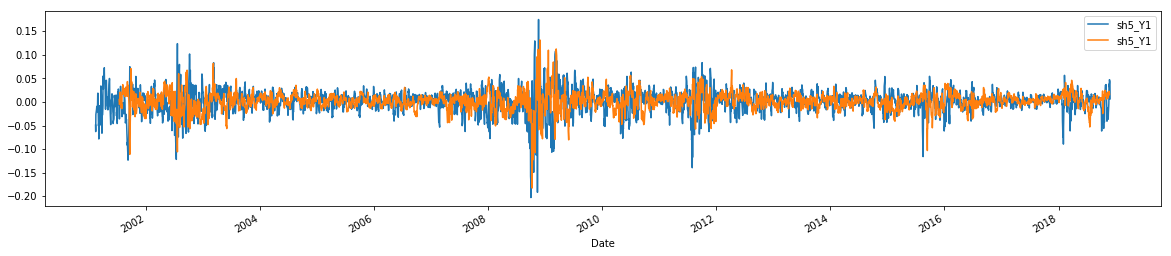

In [64]:
i = 5
pd.concat((sp500_label['sh{}_Y1'.format(i)], 
    result['sh{}_Y1'.format(i)]),axis=1).plot(figsize=(20,4))

In [67]:
t = pd.concat((sp500_label['sh{}_Y1'.format(i)], result['sh{}_Y1'.format(i)]),axis=1).dropna()
t.columns = [1,2]

In [70]:
from sklearn import metrics
metrics.accuracy_score(t.apply(lambda x : np.where(x > 0, 1, 0))[1], t.apply(lambda x : np.where(x > 0, 1, 0))[2])

0.48294804303044175

In [61]:
import time
look_back = 50
result = pd.DataFrame(columns = sp500_label.columns,
                      index = sp500_label.index)
trial = 0
start = time.time()
const = 10
loop_size = (len(sp500_data) - look_back - 1 - const) * len(y_li)
for i in range(len(sp500_data) - look_back - 1 -const):
    for y in y_li:
        semi_start = time.time()
        try:
            k = int(y[2:4])
        except:
            k = int(y[2])
            
        xgb_reg = XGBRegressor()
        xgb_reg.fit(sp500_data.iloc[i:i+look_back],
                    sp500_label.iloc[i:i+look_back][y])
        pred = xgb_reg.predict(
            sp500_data.iloc[i+look_back+k:i+look_back+k+1])
        result.iloc[look_back+i+k-1][y] = pred[0]
        del xgb_reg
        trial += 1
        semi_elapse = time.time() - semi_start
        print('Done {} / {}'.format(trial, loop_size))
        print('\t {:.4f} sec'.format(semi_elapse))
elapse = time.time() - start

Done 1 / 13257
	 0.0359 sec
Done 2 / 13257
	 0.0249 sec
Done 3 / 13257
	 0.0239 sec
Done 4 / 13257
	 0.0349 sec
Done 5 / 13257
	 0.0269 sec
Done 6 / 13257
	 0.0259 sec
Done 7 / 13257
	 0.0259 sec
Done 8 / 13257
	 0.0299 sec
Done 9 / 13257
	 0.0529 sec
Done 10 / 13257
	 0.0469 sec
Done 11 / 13257
	 0.0289 sec
Done 12 / 13257
	 0.0209 sec
Done 13 / 13257
	 0.0229 sec
Done 14 / 13257
	 0.0219 sec
Done 15 / 13257
	 0.0269 sec
Done 16 / 13257
	 0.0309 sec
Done 17 / 13257
	 0.0229 sec
Done 18 / 13257
	 0.0219 sec
Done 19 / 13257
	 0.0219 sec
Done 20 / 13257
	 0.0219 sec
Done 21 / 13257
	 0.0219 sec
Done 22 / 13257
	 0.0219 sec
Done 23 / 13257
	 0.0209 sec
Done 24 / 13257
	 0.0289 sec
Done 25 / 13257
	 0.0329 sec
Done 26 / 13257
	 0.0229 sec
Done 27 / 13257
	 0.0219 sec
Done 28 / 13257
	 0.0219 sec
Done 29 / 13257
	 0.0219 sec
Done 30 / 13257
	 0.0219 sec
Done 31 / 13257
	 0.0219 sec
Done 32 / 13257
	 0.0279 sec
Done 33 / 13257
	 0.0309 sec
Done 34 / 13257
	 0.0309 sec
Done 35 / 13257
	 0.020

Done 283 / 13257
	 0.0698 sec
Done 284 / 13257
	 0.0439 sec
Done 285 / 13257
	 0.0279 sec
Done 286 / 13257
	 0.0249 sec
Done 287 / 13257
	 0.0279 sec
Done 288 / 13257
	 0.0249 sec
Done 289 / 13257
	 0.0229 sec
Done 290 / 13257
	 0.0379 sec
Done 291 / 13257
	 0.0289 sec
Done 292 / 13257
	 0.0299 sec
Done 293 / 13257
	 0.0239 sec
Done 294 / 13257
	 0.0269 sec
Done 295 / 13257
	 0.0229 sec
Done 296 / 13257
	 0.0259 sec
Done 297 / 13257
	 0.0369 sec
Done 298 / 13257
	 0.0309 sec
Done 299 / 13257
	 0.0219 sec
Done 300 / 13257
	 0.0219 sec
Done 301 / 13257
	 0.0229 sec
Done 302 / 13257
	 0.0259 sec
Done 303 / 13257
	 0.0239 sec
Done 304 / 13257
	 0.0479 sec
Done 305 / 13257
	 0.0299 sec
Done 306 / 13257
	 0.0239 sec
Done 307 / 13257
	 0.0229 sec
Done 308 / 13257
	 0.0239 sec
Done 309 / 13257
	 0.0269 sec
Done 310 / 13257
	 0.0309 sec
Done 311 / 13257
	 0.0359 sec
Done 312 / 13257
	 0.0329 sec
Done 313 / 13257
	 0.0229 sec
Done 314 / 13257
	 0.0249 sec
Done 315 / 13257
	 0.0259 sec
Done 316 /

Done 563 / 13257
	 0.0229 sec
Done 564 / 13257
	 0.0269 sec
Done 565 / 13257
	 0.0229 sec
Done 566 / 13257
	 0.0219 sec
Done 567 / 13257
	 0.0279 sec
Done 568 / 13257
	 0.0259 sec
Done 569 / 13257
	 0.0219 sec
Done 570 / 13257
	 0.0219 sec
Done 571 / 13257
	 0.0219 sec
Done 572 / 13257
	 0.0249 sec
Done 573 / 13257
	 0.0219 sec
Done 574 / 13257
	 0.0229 sec
Done 575 / 13257
	 0.0219 sec
Done 576 / 13257
	 0.0209 sec
Done 577 / 13257
	 0.0229 sec
Done 578 / 13257
	 0.0229 sec
Done 579 / 13257
	 0.0219 sec
Done 580 / 13257
	 0.0229 sec
Done 581 / 13257
	 0.0229 sec
Done 582 / 13257
	 0.0249 sec
Done 583 / 13257
	 0.0219 sec
Done 584 / 13257
	 0.0229 sec
Done 585 / 13257
	 0.0219 sec
Done 586 / 13257
	 0.0219 sec
Done 587 / 13257
	 0.0209 sec
Done 588 / 13257
	 0.0209 sec
Done 589 / 13257
	 0.0219 sec
Done 590 / 13257
	 0.0239 sec
Done 591 / 13257
	 0.0229 sec
Done 592 / 13257
	 0.0219 sec
Done 593 / 13257
	 0.0219 sec
Done 594 / 13257
	 0.0209 sec
Done 595 / 13257
	 0.0219 sec
Done 596 /

Done 842 / 13257
	 0.0229 sec
Done 843 / 13257
	 0.0239 sec
Done 844 / 13257
	 0.0249 sec
Done 845 / 13257
	 0.0219 sec
Done 846 / 13257
	 0.0219 sec
Done 847 / 13257
	 0.0209 sec
Done 848 / 13257
	 0.0219 sec
Done 849 / 13257
	 0.0219 sec
Done 850 / 13257
	 0.0219 sec
Done 851 / 13257
	 0.0209 sec
Done 852 / 13257
	 0.0269 sec
Done 853 / 13257
	 0.0239 sec
Done 854 / 13257
	 0.0209 sec
Done 855 / 13257
	 0.0219 sec
Done 856 / 13257
	 0.0209 sec
Done 857 / 13257
	 0.0219 sec
Done 858 / 13257
	 0.0219 sec
Done 859 / 13257
	 0.0209 sec
Done 860 / 13257
	 0.0219 sec
Done 861 / 13257
	 0.0229 sec
Done 862 / 13257
	 0.0239 sec
Done 863 / 13257
	 0.0209 sec
Done 864 / 13257
	 0.0219 sec
Done 865 / 13257
	 0.0209 sec
Done 866 / 13257
	 0.0229 sec
Done 867 / 13257
	 0.0219 sec
Done 868 / 13257
	 0.0229 sec
Done 869 / 13257
	 0.0209 sec
Done 870 / 13257
	 0.0229 sec
Done 871 / 13257
	 0.0259 sec
Done 872 / 13257
	 0.0219 sec
Done 873 / 13257
	 0.0209 sec
Done 874 / 13257
	 0.0209 sec
Done 875 /

Done 1119 / 13257
	 0.0229 sec
Done 1120 / 13257
	 0.0219 sec
Done 1121 / 13257
	 0.0229 sec
Done 1122 / 13257
	 0.0219 sec
Done 1123 / 13257
	 0.0209 sec
Done 1124 / 13257
	 0.0209 sec
Done 1125 / 13257
	 0.0219 sec
Done 1126 / 13257
	 0.0209 sec
Done 1127 / 13257
	 0.0219 sec
Done 1128 / 13257
	 0.0249 sec
Done 1129 / 13257
	 0.0229 sec
Done 1130 / 13257
	 0.0249 sec
Done 1131 / 13257
	 0.0209 sec
Done 1132 / 13257
	 0.0199 sec
Done 1133 / 13257
	 0.0209 sec
Done 1134 / 13257
	 0.0229 sec
Done 1135 / 13257
	 0.0209 sec
Done 1136 / 13257
	 0.0209 sec
Done 1137 / 13257
	 0.0219 sec
Done 1138 / 13257
	 0.0229 sec
Done 1139 / 13257
	 0.0229 sec
Done 1140 / 13257
	 0.0209 sec
Done 1141 / 13257
	 0.0209 sec
Done 1142 / 13257
	 0.0209 sec
Done 1143 / 13257
	 0.0219 sec
Done 1144 / 13257
	 0.0239 sec
Done 1145 / 13257
	 0.0219 sec
Done 1146 / 13257
	 0.0229 sec
Done 1147 / 13257
	 0.0219 sec
Done 1148 / 13257
	 0.0229 sec
Done 1149 / 13257
	 0.0219 sec
Done 1150 / 13257
	 0.0219 sec
Done 115

Done 1388 / 13257
	 0.0259 sec
Done 1389 / 13257
	 0.0379 sec
Done 1390 / 13257
	 0.0239 sec
Done 1391 / 13257
	 0.0219 sec
Done 1392 / 13257
	 0.0229 sec
Done 1393 / 13257
	 0.0209 sec
Done 1394 / 13257
	 0.0209 sec
Done 1395 / 13257
	 0.0219 sec
Done 1396 / 13257
	 0.0219 sec
Done 1397 / 13257
	 0.0249 sec
Done 1398 / 13257
	 0.0259 sec
Done 1399 / 13257
	 0.0219 sec
Done 1400 / 13257
	 0.0219 sec
Done 1401 / 13257
	 0.0209 sec
Done 1402 / 13257
	 0.0199 sec
Done 1403 / 13257
	 0.0209 sec
Done 1404 / 13257
	 0.0219 sec
Done 1405 / 13257
	 0.0209 sec
Done 1406 / 13257
	 0.0219 sec
Done 1407 / 13257
	 0.0239 sec
Done 1408 / 13257
	 0.0229 sec
Done 1409 / 13257
	 0.0219 sec
Done 1410 / 13257
	 0.0279 sec
Done 1411 / 13257
	 0.0219 sec
Done 1412 / 13257
	 0.0209 sec
Done 1413 / 13257
	 0.0209 sec
Done 1414 / 13257
	 0.0229 sec
Done 1415 / 13257
	 0.0260 sec
Done 1416 / 13257
	 0.0319 sec
Done 1417 / 13257
	 0.0200 sec
Done 1418 / 13257
	 0.0219 sec
Done 1419 / 13257
	 0.0220 sec
Done 142

Done 1653 / 13257
	 0.0230 sec
Done 1654 / 13257
	 0.0229 sec
Done 1655 / 13257
	 0.0239 sec
Done 1656 / 13257
	 0.0239 sec
Done 1657 / 13257
	 0.0219 sec
Done 1658 / 13257
	 0.0219 sec
Done 1659 / 13257
	 0.0219 sec
Done 1660 / 13257
	 0.0209 sec
Done 1661 / 13257
	 0.0219 sec
Done 1662 / 13257
	 0.0229 sec
Done 1663 / 13257
	 0.0239 sec
Done 1664 / 13257
	 0.0219 sec
Done 1665 / 13257
	 0.0219 sec
Done 1666 / 13257
	 0.0219 sec
Done 1667 / 13257
	 0.0229 sec
Done 1668 / 13257
	 0.0219 sec
Done 1669 / 13257
	 0.0219 sec
Done 1670 / 13257
	 0.0249 sec
Done 1671 / 13257
	 0.0239 sec
Done 1672 / 13257
	 0.0229 sec
Done 1673 / 13257
	 0.0219 sec
Done 1674 / 13257
	 0.0219 sec
Done 1675 / 13257
	 0.0219 sec
Done 1676 / 13257
	 0.0209 sec
Done 1677 / 13257
	 0.0239 sec
Done 1678 / 13257
	 0.0219 sec
Done 1679 / 13257
	 0.0239 sec
Done 1680 / 13257
	 0.0239 sec
Done 1681 / 13257
	 0.0249 sec
Done 1682 / 13257
	 0.0239 sec
Done 1683 / 13257
	 0.0209 sec
Done 1684 / 13257
	 0.0209 sec
Done 168

Done 1921 / 13257
	 0.0319 sec
Done 1922 / 13257
	 0.0299 sec
Done 1923 / 13257
	 0.0229 sec
Done 1924 / 13257
	 0.0219 sec
Done 1925 / 13257
	 0.0209 sec
Done 1926 / 13257
	 0.0209 sec
Done 1927 / 13257
	 0.0219 sec
Done 1928 / 13257
	 0.0219 sec
Done 1929 / 13257
	 0.0210 sec
Done 1930 / 13257
	 0.0249 sec
Done 1931 / 13257
	 0.0239 sec
Done 1932 / 13257
	 0.0219 sec
Done 1933 / 13257
	 0.0219 sec
Done 1934 / 13257
	 0.0229 sec
Done 1935 / 13257
	 0.0220 sec
Done 1936 / 13257
	 0.0229 sec
Done 1937 / 13257
	 0.0219 sec
Done 1938 / 13257
	 0.0219 sec
Done 1939 / 13257
	 0.0249 sec
Done 1940 / 13257
	 0.0229 sec
Done 1941 / 13257
	 0.0239 sec
Done 1942 / 13257
	 0.0219 sec
Done 1943 / 13257
	 0.0219 sec
Done 1944 / 13257
	 0.0219 sec
Done 1945 / 13257
	 0.0219 sec
Done 1946 / 13257
	 0.0219 sec
Done 1947 / 13257
	 0.0219 sec
Done 1948 / 13257
	 0.0269 sec
Done 1949 / 13257
	 0.0229 sec
Done 1950 / 13257
	 0.0219 sec
Done 1951 / 13257
	 0.0199 sec
Done 1952 / 13257
	 0.0209 sec
Done 195

Done 2192 / 13257
	 0.0229 sec
Done 2193 / 13257
	 0.0249 sec
Done 2194 / 13257
	 0.0209 sec
Done 2195 / 13257
	 0.0209 sec
Done 2196 / 13257
	 0.0219 sec
Done 2197 / 13257
	 0.0219 sec
Done 2198 / 13257
	 0.0219 sec
Done 2199 / 13257
	 0.0219 sec
Done 2200 / 13257
	 0.0229 sec
Done 2201 / 13257
	 0.0209 sec
Done 2202 / 13257
	 0.0239 sec
Done 2203 / 13257
	 0.0239 sec
Done 2204 / 13257
	 0.0209 sec
Done 2205 / 13257
	 0.0219 sec
Done 2206 / 13257
	 0.0209 sec
Done 2207 / 13257
	 0.0219 sec
Done 2208 / 13257
	 0.0219 sec
Done 2209 / 13257
	 0.0209 sec
Done 2210 / 13257
	 0.0219 sec
Done 2211 / 13257
	 0.0239 sec
Done 2212 / 13257
	 0.0239 sec
Done 2213 / 13257
	 0.0239 sec
Done 2214 / 13257
	 0.0219 sec
Done 2215 / 13257
	 0.0219 sec
Done 2216 / 13257
	 0.0229 sec
Done 2217 / 13257
	 0.0219 sec
Done 2218 / 13257
	 0.0219 sec
Done 2219 / 13257
	 0.0219 sec
Done 2220 / 13257
	 0.0239 sec
Done 2221 / 13257
	 0.0239 sec
Done 2222 / 13257
	 0.0219 sec
Done 2223 / 13257
	 0.0229 sec
Done 222

Done 2458 / 13257
	 0.0229 sec
Done 2459 / 13257
	 0.0209 sec
Done 2460 / 13257
	 0.0239 sec
Done 2461 / 13257
	 0.0219 sec
Done 2462 / 13257
	 0.0209 sec
Done 2463 / 13257
	 0.0219 sec
Done 2464 / 13257
	 0.0219 sec
Done 2465 / 13257
	 0.0209 sec
Done 2466 / 13257
	 0.0209 sec
Done 2467 / 13257
	 0.0229 sec
Done 2468 / 13257
	 0.0249 sec
Done 2469 / 13257
	 0.0219 sec
Done 2470 / 13257
	 0.0209 sec
Done 2471 / 13257
	 0.0209 sec
Done 2472 / 13257
	 0.0209 sec
Done 2473 / 13257
	 0.0219 sec
Done 2474 / 13257
	 0.0229 sec
Done 2475 / 13257
	 0.0219 sec
Done 2476 / 13257
	 0.0239 sec
Done 2477 / 13257
	 0.0239 sec
Done 2478 / 13257
	 0.0229 sec
Done 2479 / 13257
	 0.0209 sec
Done 2480 / 13257
	 0.0219 sec
Done 2481 / 13257
	 0.0229 sec
Done 2482 / 13257
	 0.0229 sec
Done 2483 / 13257
	 0.0269 sec
Done 2484 / 13257
	 0.0269 sec
Done 2485 / 13257
	 0.0289 sec
Done 2486 / 13257
	 0.0279 sec
Done 2487 / 13257
	 0.0239 sec
Done 2488 / 13257
	 0.0229 sec
Done 2489 / 13257
	 0.0219 sec
Done 249

Done 2994 / 13257
	 0.0359 sec
Done 2995 / 13257
	 0.0239 sec
Done 2996 / 13257
	 0.0209 sec
Done 2997 / 13257
	 0.0209 sec
Done 2998 / 13257
	 0.0219 sec
Done 2999 / 13257
	 0.0309 sec
Done 3000 / 13257
	 0.0219 sec
Done 3001 / 13257
	 0.0219 sec
Done 3002 / 13257
	 0.0219 sec
Done 3003 / 13257
	 0.0229 sec
Done 3004 / 13257
	 0.0259 sec
Done 3005 / 13257
	 0.0219 sec
Done 3006 / 13257
	 0.0209 sec
Done 3007 / 13257
	 0.0219 sec
Done 3008 / 13257
	 0.0219 sec
Done 3009 / 13257
	 0.0219 sec
Done 3010 / 13257
	 0.0209 sec
Done 3011 / 13257
	 0.0209 sec
Done 3012 / 13257
	 0.0219 sec
Done 3013 / 13257
	 0.0239 sec
Done 3014 / 13257
	 0.0229 sec
Done 3015 / 13257
	 0.0219 sec
Done 3016 / 13257
	 0.0209 sec
Done 3017 / 13257
	 0.0219 sec
Done 3018 / 13257
	 0.0209 sec
Done 3019 / 13257
	 0.0219 sec
Done 3020 / 13257
	 0.0209 sec
Done 3021 / 13257
	 0.0239 sec
Done 3022 / 13257
	 0.0249 sec
Done 3023 / 13257
	 0.0229 sec
Done 3024 / 13257
	 0.0239 sec
Done 3025 / 13257
	 0.0219 sec
Done 302

Done 3265 / 13257
	 0.0229 sec
Done 3266 / 13257
	 0.0239 sec
Done 3267 / 13257
	 0.0219 sec
Done 3268 / 13257
	 0.0209 sec
Done 3269 / 13257
	 0.0219 sec
Done 3270 / 13257
	 0.0219 sec
Done 3271 / 13257
	 0.0209 sec
Done 3272 / 13257
	 0.0219 sec
Done 3273 / 13257
	 0.0219 sec
Done 3274 / 13257
	 0.0229 sec
Done 3275 / 13257
	 0.0259 sec
Done 3276 / 13257
	 0.0229 sec
Done 3277 / 13257
	 0.0279 sec
Done 3278 / 13257
	 0.0229 sec
Done 3279 / 13257
	 0.0249 sec
Done 3280 / 13257
	 0.0219 sec
Done 3281 / 13257
	 0.0209 sec
Done 3282 / 13257
	 0.0219 sec
Done 3283 / 13257
	 0.0229 sec
Done 3284 / 13257
	 0.0259 sec
Done 3285 / 13257
	 0.0219 sec
Done 3286 / 13257
	 0.0219 sec
Done 3287 / 13257
	 0.0209 sec
Done 3288 / 13257
	 0.0219 sec
Done 3289 / 13257
	 0.0209 sec
Done 3290 / 13257
	 0.0219 sec
Done 3291 / 13257
	 0.0219 sec
Done 3292 / 13257
	 0.0239 sec
Done 3293 / 13257
	 0.0229 sec
Done 3294 / 13257
	 0.0219 sec
Done 3295 / 13257
	 0.0209 sec
Done 3296 / 13257
	 0.0249 sec
Done 329

Done 3533 / 13257
	 0.0229 sec
Done 3534 / 13257
	 0.0259 sec
Done 3535 / 13257
	 0.0219 sec
Done 3536 / 13257
	 0.0219 sec
Done 3537 / 13257
	 0.0219 sec
Done 3538 / 13257
	 0.0199 sec
Done 3539 / 13257
	 0.0219 sec
Done 3540 / 13257
	 0.0209 sec
Done 3541 / 13257
	 0.0199 sec
Done 3542 / 13257
	 0.0219 sec
Done 3543 / 13257
	 0.0239 sec
Done 3544 / 13257
	 0.0249 sec
Done 3545 / 13257
	 0.0219 sec
Done 3546 / 13257
	 0.0219 sec
Done 3547 / 13257
	 0.0209 sec
Done 3548 / 13257
	 0.0249 sec
Done 3549 / 13257
	 0.0219 sec
Done 3550 / 13257
	 0.0209 sec
Done 3551 / 13257
	 0.0219 sec
Done 3552 / 13257
	 0.0249 sec
Done 3553 / 13257
	 0.0239 sec
Done 3554 / 13257
	 0.0229 sec
Done 3555 / 13257
	 0.0219 sec
Done 3556 / 13257
	 0.0219 sec
Done 3557 / 13257
	 0.0229 sec
Done 3558 / 13257
	 0.0219 sec
Done 3559 / 13257
	 0.0219 sec
Done 3560 / 13257
	 0.0219 sec
Done 3561 / 13257
	 0.0249 sec
Done 3562 / 13257
	 0.0309 sec
Done 3563 / 13257
	 0.0209 sec
Done 3564 / 13257
	 0.0219 sec
Done 356

Done 3803 / 13257
	 0.0229 sec
Done 3804 / 13257
	 0.0249 sec
Done 3805 / 13257
	 0.0229 sec
Done 3806 / 13257
	 0.0230 sec
Done 3807 / 13257
	 0.0229 sec
Done 3808 / 13257
	 0.0219 sec
Done 3809 / 13257
	 0.0220 sec
Done 3810 / 13257
	 0.0219 sec
Done 3811 / 13257
	 0.0209 sec
Done 3812 / 13257
	 0.0289 sec
Done 3813 / 13257
	 0.0239 sec
Done 3814 / 13257
	 0.0219 sec
Done 3815 / 13257
	 0.0209 sec
Done 3816 / 13257
	 0.0219 sec
Done 3817 / 13257
	 0.0219 sec
Done 3818 / 13257
	 0.0239 sec
Done 3819 / 13257
	 0.0219 sec
Done 3820 / 13257
	 0.0219 sec
Done 3821 / 13257
	 0.0229 sec
Done 3822 / 13257
	 0.0229 sec
Done 3823 / 13257
	 0.0229 sec
Done 3824 / 13257
	 0.0219 sec
Done 3825 / 13257
	 0.0229 sec
Done 3826 / 13257
	 0.0219 sec
Done 3827 / 13257
	 0.0289 sec
Done 3828 / 13257
	 0.0229 sec
Done 3829 / 13257
	 0.0209 sec
Done 3830 / 13257
	 0.0229 sec
Done 3831 / 13257
	 0.0239 sec
Done 3832 / 13257
	 0.0239 sec
Done 3833 / 13257
	 0.0209 sec
Done 3834 / 13257
	 0.0219 sec
Done 383

Done 4074 / 13257
	 0.0229 sec
Done 4075 / 13257
	 0.0229 sec
Done 4076 / 13257
	 0.0249 sec
Done 4077 / 13257
	 0.0219 sec
Done 4078 / 13257
	 0.0219 sec
Done 4079 / 13257
	 0.0229 sec
Done 4080 / 13257
	 0.0209 sec
Done 4081 / 13257
	 0.0209 sec
Done 4082 / 13257
	 0.0219 sec
Done 4083 / 13257
	 0.0219 sec
Done 4084 / 13257
	 0.0239 sec
Done 4085 / 13257
	 0.0239 sec
Done 4086 / 13257
	 0.0229 sec
Done 4087 / 13257
	 0.0219 sec
Done 4088 / 13257
	 0.0219 sec
Done 4089 / 13257
	 0.0209 sec
Done 4090 / 13257
	 0.0239 sec
Done 4091 / 13257
	 0.0239 sec
Done 4092 / 13257
	 0.0219 sec
Done 4093 / 13257
	 0.0249 sec
Done 4094 / 13257
	 0.0229 sec
Done 4095 / 13257
	 0.0209 sec
Done 4096 / 13257
	 0.0209 sec
Done 4097 / 13257
	 0.0209 sec
Done 4098 / 13257
	 0.0219 sec
Done 4099 / 13257
	 0.0209 sec
Done 4100 / 13257
	 0.0209 sec
Done 4101 / 13257
	 0.0219 sec
Done 4102 / 13257
	 0.0240 sec
Done 4103 / 13257
	 0.0239 sec
Done 4104 / 13257
	 0.0239 sec
Done 4105 / 13257
	 0.0209 sec
Done 410

Done 4339 / 13257
	 0.0249 sec
Done 4340 / 13257
	 0.0379 sec
Done 4341 / 13257
	 0.0219 sec
Done 4342 / 13257
	 0.0219 sec
Done 4343 / 13257
	 0.0219 sec
Done 4344 / 13257
	 0.0219 sec
Done 4345 / 13257
	 0.0229 sec
Done 4346 / 13257
	 0.0209 sec
Done 4347 / 13257
	 0.0209 sec
Done 4348 / 13257
	 0.0250 sec
Done 4349 / 13257
	 0.0259 sec
Done 4350 / 13257
	 0.0239 sec
Done 4351 / 13257
	 0.0219 sec
Done 4352 / 13257
	 0.0219 sec
Done 4353 / 13257
	 0.0219 sec
Done 4354 / 13257
	 0.0209 sec
Done 4355 / 13257
	 0.0219 sec
Done 4356 / 13257
	 0.0229 sec
Done 4357 / 13257
	 0.0379 sec
Done 4358 / 13257
	 0.0239 sec
Done 4359 / 13257
	 0.0219 sec
Done 4360 / 13257
	 0.0209 sec
Done 4361 / 13257
	 0.0210 sec
Done 4362 / 13257
	 0.0209 sec
Done 4363 / 13257
	 0.0219 sec
Done 4364 / 13257
	 0.0209 sec
Done 4365 / 13257
	 0.0229 sec
Done 4366 / 13257
	 0.0229 sec
Done 4367 / 13257
	 0.0229 sec
Done 4368 / 13257
	 0.0209 sec
Done 4369 / 13257
	 0.0209 sec
Done 4370 / 13257
	 0.0219 sec
Done 437

Done 4610 / 13257
	 0.0219 sec
Done 4611 / 13257
	 0.0229 sec
Done 4612 / 13257
	 0.0329 sec
Done 4613 / 13257
	 0.0289 sec
Done 4614 / 13257
	 0.0219 sec
Done 4615 / 13257
	 0.0209 sec
Done 4616 / 13257
	 0.0209 sec
Done 4617 / 13257
	 0.0209 sec
Done 4618 / 13257
	 0.0209 sec
Done 4619 / 13257
	 0.0229 sec
Done 4620 / 13257
	 0.0259 sec
Done 4621 / 13257
	 0.0209 sec
Done 4622 / 13257
	 0.0229 sec
Done 4623 / 13257
	 0.0219 sec
Done 4624 / 13257
	 0.0259 sec
Done 4625 / 13257
	 0.0229 sec
Done 4626 / 13257
	 0.0219 sec
Done 4627 / 13257
	 0.0229 sec
Done 4628 / 13257
	 0.0229 sec
Done 4629 / 13257
	 0.0239 sec
Done 4630 / 13257
	 0.0229 sec
Done 4631 / 13257
	 0.0219 sec
Done 4632 / 13257
	 0.0219 sec
Done 4633 / 13257
	 0.0229 sec
Done 4634 / 13257
	 0.0209 sec
Done 4635 / 13257
	 0.0229 sec
Done 4636 / 13257
	 0.0229 sec
Done 4637 / 13257
	 0.0259 sec
Done 4638 / 13257
	 0.0249 sec
Done 4639 / 13257
	 0.0209 sec
Done 4640 / 13257
	 0.0219 sec
Done 4641 / 13257
	 0.0219 sec
Done 464

Done 4878 / 13257
	 0.0259 sec
Done 4879 / 13257
	 0.0269 sec
Done 4880 / 13257
	 0.0269 sec
Done 4881 / 13257
	 0.0209 sec
Done 4882 / 13257
	 0.0209 sec
Done 4883 / 13257
	 0.0209 sec
Done 4884 / 13257
	 0.0259 sec
Done 4885 / 13257
	 0.0219 sec
Done 4886 / 13257
	 0.0219 sec
Done 4887 / 13257
	 0.0249 sec
Done 4888 / 13257
	 0.0239 sec
Done 4889 / 13257
	 0.0209 sec
Done 4890 / 13257
	 0.0219 sec
Done 4891 / 13257
	 0.0209 sec
Done 4892 / 13257
	 0.0209 sec
Done 4893 / 13257
	 0.0219 sec
Done 4894 / 13257
	 0.0209 sec
Done 4895 / 13257
	 0.0229 sec
Done 4896 / 13257
	 0.0219 sec
Done 4897 / 13257
	 0.0229 sec
Done 4898 / 13257
	 0.0239 sec
Done 4899 / 13257
	 0.0229 sec
Done 4900 / 13257
	 0.0209 sec
Done 4901 / 13257
	 0.0219 sec
Done 4902 / 13257
	 0.0219 sec
Done 4903 / 13257
	 0.0229 sec
Done 4904 / 13257
	 0.0209 sec
Done 4905 / 13257
	 0.0209 sec
Done 4906 / 13257
	 0.0239 sec
Done 4907 / 13257
	 0.0249 sec
Done 4908 / 13257
	 0.0219 sec
Done 4909 / 13257
	 0.0219 sec
Done 491

Done 5144 / 13257
	 0.0339 sec
Done 5145 / 13257
	 0.0259 sec
Done 5146 / 13257
	 0.0309 sec
Done 5147 / 13257
	 0.0259 sec
Done 5148 / 13257
	 0.0229 sec
Done 5149 / 13257
	 0.0209 sec
Done 5150 / 13257
	 0.0209 sec
Done 5151 / 13257
	 0.0219 sec
Done 5152 / 13257
	 0.0229 sec
Done 5153 / 13257
	 0.0279 sec
Done 5154 / 13257
	 0.0239 sec
Done 5155 / 13257
	 0.0229 sec
Done 5156 / 13257
	 0.0209 sec
Done 5157 / 13257
	 0.0219 sec
Done 5158 / 13257
	 0.0209 sec
Done 5159 / 13257
	 0.0209 sec
Done 5160 / 13257
	 0.0219 sec
Done 5161 / 13257
	 0.0229 sec
Done 5162 / 13257
	 0.0309 sec
Done 5163 / 13257
	 0.0219 sec
Done 5164 / 13257
	 0.0219 sec
Done 5165 / 13257
	 0.0209 sec
Done 5166 / 13257
	 0.0209 sec
Done 5167 / 13257
	 0.0239 sec
Done 5168 / 13257
	 0.0209 sec
Done 5169 / 13257
	 0.0219 sec
Done 5170 / 13257
	 0.0219 sec
Done 5171 / 13257
	 0.0219 sec
Done 5172 / 13257
	 0.0269 sec
Done 5173 / 13257
	 0.0249 sec
Done 5174 / 13257
	 0.0219 sec
Done 5175 / 13257
	 0.0219 sec
Done 517

Done 5416 / 13257
	 0.0209 sec
Done 5417 / 13257
	 0.0339 sec
Done 5418 / 13257
	 0.0279 sec
Done 5419 / 13257
	 0.0209 sec
Done 5420 / 13257
	 0.0219 sec
Done 5421 / 13257
	 0.0209 sec
Done 5422 / 13257
	 0.0210 sec
Done 5423 / 13257
	 0.0219 sec
Done 5424 / 13257
	 0.0229 sec
Done 5425 / 13257
	 0.0229 sec
Done 5426 / 13257
	 0.0249 sec
Done 5427 / 13257
	 0.0219 sec
Done 5428 / 13257
	 0.0209 sec
Done 5429 / 13257
	 0.0219 sec
Done 5430 / 13257
	 0.0209 sec
Done 5431 / 13257
	 0.0209 sec
Done 5432 / 13257
	 0.0219 sec
Done 5433 / 13257
	 0.0219 sec
Done 5434 / 13257
	 0.0249 sec
Done 5435 / 13257
	 0.0239 sec
Done 5436 / 13257
	 0.0209 sec
Done 5437 / 13257
	 0.0219 sec
Done 5438 / 13257
	 0.0209 sec
Done 5439 / 13257
	 0.0209 sec
Done 5440 / 13257
	 0.0209 sec
Done 5441 / 13257
	 0.0219 sec
Done 5442 / 13257
	 0.0209 sec
Done 5443 / 13257
	 0.0249 sec
Done 5444 / 13257
	 0.0229 sec
Done 5445 / 13257
	 0.0219 sec
Done 5446 / 13257
	 0.0209 sec
Done 5447 / 13257
	 0.0219 sec
Done 544

Done 5687 / 13257
	 0.0239 sec
Done 5688 / 13257
	 0.0229 sec
Done 5689 / 13257
	 0.0249 sec
Done 5690 / 13257
	 0.0239 sec
Done 5691 / 13257
	 0.0229 sec
Done 5692 / 13257
	 0.0209 sec
Done 5693 / 13257
	 0.0209 sec
Done 5694 / 13257
	 0.0219 sec
Done 5695 / 13257
	 0.0219 sec
Done 5696 / 13257
	 0.0229 sec
Done 5697 / 13257
	 0.0239 sec
Done 5698 / 13257
	 0.0229 sec
Done 5699 / 13257
	 0.0219 sec
Done 5700 / 13257
	 0.0209 sec
Done 5701 / 13257
	 0.0219 sec
Done 5702 / 13257
	 0.0219 sec
Done 5703 / 13257
	 0.0219 sec
Done 5704 / 13257
	 0.0219 sec
Done 5705 / 13257
	 0.0229 sec
Done 5706 / 13257
	 0.0229 sec
Done 5707 / 13257
	 0.0229 sec
Done 5708 / 13257
	 0.0219 sec
Done 5709 / 13257
	 0.0209 sec
Done 5710 / 13257
	 0.0219 sec
Done 5711 / 13257
	 0.0219 sec
Done 5712 / 13257
	 0.0219 sec
Done 5713 / 13257
	 0.0209 sec
Done 5714 / 13257
	 0.0259 sec
Done 5715 / 13257
	 0.0229 sec
Done 5716 / 13257
	 0.0209 sec
Done 5717 / 13257
	 0.0219 sec
Done 5718 / 13257
	 0.0209 sec
Done 571

Done 5959 / 13257
	 0.0259 sec
Done 5960 / 13257
	 0.0279 sec
Done 5961 / 13257
	 0.0219 sec
Done 5962 / 13257
	 0.0229 sec
Done 5963 / 13257
	 0.0209 sec
Done 5964 / 13257
	 0.0209 sec
Done 5965 / 13257
	 0.0209 sec
Done 5966 / 13257
	 0.0219 sec
Done 5967 / 13257
	 0.0209 sec
Done 5968 / 13257
	 0.0239 sec
Done 5969 / 13257
	 0.0239 sec
Done 5970 / 13257
	 0.0229 sec
Done 5971 / 13257
	 0.0219 sec
Done 5972 / 13257
	 0.0219 sec
Done 5973 / 13257
	 0.0219 sec
Done 5974 / 13257
	 0.0209 sec
Done 5975 / 13257
	 0.0219 sec
Done 5976 / 13257
	 0.0209 sec
Done 5977 / 13257
	 0.0199 sec
Done 5978 / 13257
	 0.0239 sec
Done 5979 / 13257
	 0.0239 sec
Done 5980 / 13257
	 0.0249 sec
Done 5981 / 13257
	 0.0209 sec
Done 5982 / 13257
	 0.0219 sec
Done 5983 / 13257
	 0.0209 sec
Done 5984 / 13257
	 0.0219 sec
Done 5985 / 13257
	 0.0209 sec
Done 5986 / 13257
	 0.0229 sec
Done 5987 / 13257
	 0.0239 sec
Done 5988 / 13257
	 0.0249 sec
Done 5989 / 13257
	 0.0209 sec
Done 5990 / 13257
	 0.0219 sec
Done 599

Done 6227 / 13257
	 0.0309 sec
Done 6228 / 13257
	 0.0289 sec
Done 6229 / 13257
	 0.0209 sec
Done 6230 / 13257
	 0.0209 sec
Done 6231 / 13257
	 0.0219 sec
Done 6232 / 13257
	 0.0219 sec
Done 6233 / 13257
	 0.0219 sec
Done 6234 / 13257
	 0.0219 sec
Done 6235 / 13257
	 0.0219 sec
Done 6236 / 13257
	 0.0239 sec
Done 6237 / 13257
	 0.0229 sec
Done 6238 / 13257
	 0.0229 sec
Done 6239 / 13257
	 0.0209 sec
Done 6240 / 13257
	 0.0219 sec
Done 6241 / 13257
	 0.0219 sec
Done 6242 / 13257
	 0.0219 sec
Done 6243 / 13257
	 0.0219 sec
Done 6244 / 13257
	 0.0219 sec
Done 6245 / 13257
	 0.0259 sec
Done 6246 / 13257
	 0.0229 sec
Done 6247 / 13257
	 0.0219 sec
Done 6248 / 13257
	 0.0209 sec
Done 6249 / 13257
	 0.0229 sec
Done 6250 / 13257
	 0.0219 sec
Done 6251 / 13257
	 0.0209 sec
Done 6252 / 13257
	 0.0209 sec
Done 6253 / 13257
	 0.0209 sec
Done 6254 / 13257
	 0.0229 sec
Done 6255 / 13257
	 0.0259 sec
Done 6256 / 13257
	 0.0209 sec
Done 6257 / 13257
	 0.0209 sec
Done 6258 / 13257
	 0.0209 sec
Done 625

Done 6494 / 13257
	 0.0249 sec
Done 6495 / 13257
	 0.0379 sec
Done 6496 / 13257
	 0.0239 sec
Done 6497 / 13257
	 0.0219 sec
Done 6498 / 13257
	 0.0209 sec
Done 6499 / 13257
	 0.0219 sec
Done 6500 / 13257
	 0.0220 sec
Done 6501 / 13257
	 0.0209 sec
Done 6502 / 13257
	 0.0219 sec
Done 6503 / 13257
	 0.0279 sec
Done 6504 / 13257
	 0.0269 sec
Done 6505 / 13257
	 0.0249 sec
Done 6506 / 13257
	 0.0219 sec
Done 6507 / 13257
	 0.0229 sec
Done 6508 / 13257
	 0.0219 sec
Done 6509 / 13257
	 0.0219 sec
Done 6510 / 13257
	 0.0209 sec
Done 6511 / 13257
	 0.0219 sec
Done 6512 / 13257
	 0.0239 sec
Done 6513 / 13257
	 0.0239 sec
Done 6514 / 13257
	 0.0209 sec
Done 6515 / 13257
	 0.0219 sec
Done 6516 / 13257
	 0.0209 sec
Done 6517 / 13257
	 0.0239 sec
Done 6518 / 13257
	 0.0229 sec
Done 6519 / 13257
	 0.0219 sec
Done 6520 / 13257
	 0.0210 sec
Done 6521 / 13257
	 0.0239 sec
Done 6522 / 13257
	 0.0249 sec
Done 6523 / 13257
	 0.0209 sec
Done 6524 / 13257
	 0.0219 sec
Done 6525 / 13257
	 0.0209 sec
Done 652

Done 6763 / 13257
	 0.0259 sec
Done 6764 / 13257
	 0.0229 sec
Done 6765 / 13257
	 0.0279 sec
Done 6766 / 13257
	 0.0209 sec
Done 6767 / 13257
	 0.0209 sec
Done 6768 / 13257
	 0.0239 sec
Done 6769 / 13257
	 0.0199 sec
Done 6770 / 13257
	 0.0209 sec
Done 6771 / 13257
	 0.0209 sec
Done 6772 / 13257
	 0.0239 sec
Done 6773 / 13257
	 0.0239 sec
Done 6774 / 13257
	 0.0219 sec
Done 6775 / 13257
	 0.0229 sec
Done 6776 / 13257
	 0.0209 sec
Done 6777 / 13257
	 0.0209 sec
Done 6778 / 13257
	 0.0209 sec
Done 6779 / 13257
	 0.0209 sec
Done 6780 / 13257
	 0.0219 sec
Done 6781 / 13257
	 0.0219 sec
Done 6782 / 13257
	 0.0239 sec
Done 6783 / 13257
	 0.0239 sec
Done 6784 / 13257
	 0.0209 sec
Done 6785 / 13257
	 0.0209 sec
Done 6786 / 13257
	 0.0209 sec
Done 6787 / 13257
	 0.0219 sec
Done 6788 / 13257
	 0.0219 sec
Done 6789 / 13257
	 0.0239 sec
Done 6790 / 13257
	 0.0249 sec
Done 6791 / 13257
	 0.0229 sec
Done 6792 / 13257
	 0.0229 sec
Done 6793 / 13257
	 0.0219 sec
Done 6794 / 13257
	 0.0209 sec
Done 679

Done 7034 / 13257
	 0.0269 sec
Done 7035 / 13257
	 0.0239 sec
Done 7036 / 13257
	 0.0249 sec
Done 7037 / 13257
	 0.0249 sec
Done 7038 / 13257
	 0.0219 sec
Done 7039 / 13257
	 0.0299 sec
Done 7040 / 13257
	 0.0439 sec
Done 7041 / 13257
	 0.0219 sec
Done 7042 / 13257
	 0.0229 sec
Done 7043 / 13257
	 0.0239 sec
Done 7044 / 13257
	 0.0219 sec
Done 7045 / 13257
	 0.0209 sec
Done 7046 / 13257
	 0.0219 sec
Done 7047 / 13257
	 0.0219 sec
Done 7048 / 13257
	 0.0209 sec
Done 7049 / 13257
	 0.0209 sec
Done 7050 / 13257
	 0.0259 sec
Done 7051 / 13257
	 0.0219 sec
Done 7052 / 13257
	 0.0219 sec
Done 7053 / 13257
	 0.0209 sec
Done 7054 / 13257
	 0.0209 sec
Done 7055 / 13257
	 0.0249 sec
Done 7056 / 13257
	 0.0219 sec
Done 7057 / 13257
	 0.0219 sec
Done 7058 / 13257
	 0.0209 sec
Done 7059 / 13257
	 0.0239 sec
Done 7060 / 13257
	 0.0249 sec
Done 7061 / 13257
	 0.0209 sec
Done 7062 / 13257
	 0.0219 sec
Done 7063 / 13257
	 0.0219 sec
Done 7064 / 13257
	 0.0209 sec
Done 7065 / 13257
	 0.0209 sec
Done 706

Done 7306 / 13257
	 0.0219 sec
Done 7307 / 13257
	 0.0229 sec
Done 7308 / 13257
	 0.0229 sec
Done 7309 / 13257
	 0.0229 sec
Done 7310 / 13257
	 0.0209 sec
Done 7311 / 13257
	 0.0219 sec
Done 7312 / 13257
	 0.0219 sec
Done 7313 / 13257
	 0.0209 sec
Done 7314 / 13257
	 0.0209 sec
Done 7315 / 13257
	 0.0229 sec
Done 7316 / 13257
	 0.0279 sec
Done 7317 / 13257
	 0.0239 sec
Done 7318 / 13257
	 0.0209 sec
Done 7319 / 13257
	 0.0219 sec
Done 7320 / 13257
	 0.0209 sec
Done 7321 / 13257
	 0.0229 sec
Done 7322 / 13257
	 0.0239 sec
Done 7323 / 13257
	 0.0209 sec
Done 7324 / 13257
	 0.0239 sec
Done 7325 / 13257
	 0.0239 sec
Done 7326 / 13257
	 0.0219 sec
Done 7327 / 13257
	 0.0209 sec
Done 7328 / 13257
	 0.0219 sec
Done 7329 / 13257
	 0.0229 sec
Done 7330 / 13257
	 0.0209 sec
Done 7331 / 13257
	 0.0219 sec
Done 7332 / 13257
	 0.0209 sec
Done 7333 / 13257
	 0.0209 sec
Done 7334 / 13257
	 0.0229 sec
Done 7335 / 13257
	 0.0229 sec
Done 7336 / 13257
	 0.0209 sec
Done 7337 / 13257
	 0.0219 sec
Done 733

Done 7575 / 13257
	 0.0219 sec
Done 7576 / 13257
	 0.0239 sec
Done 7577 / 13257
	 0.0249 sec
Done 7578 / 13257
	 0.0209 sec
Done 7579 / 13257
	 0.0209 sec
Done 7580 / 13257
	 0.0209 sec
Done 7581 / 13257
	 0.0209 sec
Done 7582 / 13257
	 0.0209 sec
Done 7583 / 13257
	 0.0209 sec
Done 7584 / 13257
	 0.0209 sec
Done 7585 / 13257
	 0.0229 sec
Done 7586 / 13257
	 0.0269 sec
Done 7587 / 13257
	 0.0219 sec
Done 7588 / 13257
	 0.0219 sec
Done 7589 / 13257
	 0.0239 sec
Done 7590 / 13257
	 0.0219 sec
Done 7591 / 13257
	 0.0219 sec
Done 7592 / 13257
	 0.0209 sec
Done 7593 / 13257
	 0.0209 sec
Done 7594 / 13257
	 0.0229 sec
Done 7595 / 13257
	 0.0249 sec
Done 7596 / 13257
	 0.0219 sec
Done 7597 / 13257
	 0.0219 sec
Done 7598 / 13257
	 0.0209 sec
Done 7599 / 13257
	 0.0219 sec
Done 7600 / 13257
	 0.0209 sec
Done 7601 / 13257
	 0.0219 sec
Done 7602 / 13257
	 0.0219 sec
Done 7603 / 13257
	 0.0239 sec
Done 7604 / 13257
	 0.0259 sec
Done 7605 / 13257
	 0.0219 sec
Done 7606 / 13257
	 0.0209 sec
Done 760

Done 7847 / 13257
	 0.0269 sec
Done 7848 / 13257
	 0.0239 sec
Done 7849 / 13257
	 0.0249 sec
Done 7850 / 13257
	 0.0229 sec
Done 7851 / 13257
	 0.0209 sec
Done 7852 / 13257
	 0.0239 sec
Done 7853 / 13257
	 0.0219 sec
Done 7854 / 13257
	 0.0209 sec
Done 7855 / 13257
	 0.0219 sec
Done 7856 / 13257
	 0.0229 sec
Done 7857 / 13257
	 0.0249 sec
Done 7858 / 13257
	 0.0219 sec
Done 7859 / 13257
	 0.0229 sec
Done 7860 / 13257
	 0.0219 sec
Done 7861 / 13257
	 0.0219 sec
Done 7862 / 13257
	 0.0219 sec
Done 7863 / 13257
	 0.0219 sec
Done 7864 / 13257
	 0.0219 sec
Done 7865 / 13257
	 0.0229 sec
Done 7866 / 13257
	 0.0229 sec
Done 7867 / 13257
	 0.0239 sec
Done 7868 / 13257
	 0.0229 sec
Done 7869 / 13257
	 0.0219 sec
Done 7870 / 13257
	 0.0219 sec
Done 7871 / 13257
	 0.0219 sec
Done 7872 / 13257
	 0.0219 sec
Done 7873 / 13257
	 0.0210 sec
Done 7874 / 13257
	 0.0219 sec
Done 7875 / 13257
	 0.0239 sec
Done 7876 / 13257
	 0.0249 sec
Done 7877 / 13257
	 0.0219 sec
Done 7878 / 13257
	 0.0219 sec
Done 787

Done 8119 / 13257
	 0.0519 sec
Done 8120 / 13257
	 0.0349 sec
Done 8121 / 13257
	 0.0339 sec
Done 8122 / 13257
	 0.0349 sec
Done 8123 / 13257
	 0.0429 sec
Done 8124 / 13257
	 0.0429 sec
Done 8125 / 13257
	 0.0439 sec
Done 8126 / 13257
	 0.0409 sec
Done 8127 / 13257
	 0.0289 sec
Done 8128 / 13257
	 0.0499 sec
Done 8129 / 13257
	 0.0269 sec
Done 8130 / 13257
	 0.0359 sec
Done 8131 / 13257
	 0.0299 sec
Done 8132 / 13257
	 0.0219 sec
Done 8133 / 13257
	 0.0229 sec
Done 8134 / 13257
	 0.0209 sec
Done 8135 / 13257
	 0.0209 sec
Done 8136 / 13257
	 0.0209 sec
Done 8137 / 13257
	 0.0209 sec
Done 8138 / 13257
	 0.0219 sec
Done 8139 / 13257
	 0.0239 sec
Done 8140 / 13257
	 0.0229 sec
Done 8141 / 13257
	 0.0219 sec
Done 8142 / 13257
	 0.0209 sec
Done 8143 / 13257
	 0.0209 sec
Done 8144 / 13257
	 0.0229 sec
Done 8145 / 13257
	 0.0209 sec
Done 8146 / 13257
	 0.0219 sec
Done 8147 / 13257
	 0.0209 sec
Done 8148 / 13257
	 0.0229 sec
Done 8149 / 13257
	 0.0239 sec
Done 8150 / 13257
	 0.0209 sec
Done 815

Done 8384 / 13257
	 0.0239 sec
Done 8385 / 13257
	 0.0269 sec
Done 8386 / 13257
	 0.0239 sec
Done 8387 / 13257
	 0.0219 sec
Done 8388 / 13257
	 0.0219 sec
Done 8389 / 13257
	 0.0219 sec
Done 8390 / 13257
	 0.0229 sec
Done 8391 / 13257
	 0.0219 sec
Done 8392 / 13257
	 0.0219 sec
Done 8393 / 13257
	 0.0249 sec
Done 8394 / 13257
	 0.0269 sec
Done 8395 / 13257
	 0.0229 sec
Done 8396 / 13257
	 0.0219 sec
Done 8397 / 13257
	 0.0219 sec
Done 8398 / 13257
	 0.0269 sec
Done 8399 / 13257
	 0.0249 sec
Done 8400 / 13257
	 0.0219 sec
Done 8401 / 13257
	 0.0219 sec
Done 8402 / 13257
	 0.0249 sec
Done 8403 / 13257
	 0.0269 sec
Done 8404 / 13257
	 0.0239 sec
Done 8405 / 13257
	 0.0319 sec
Done 8406 / 13257
	 0.0209 sec
Done 8407 / 13257
	 0.0219 sec
Done 8408 / 13257
	 0.0209 sec
Done 8409 / 13257
	 0.0219 sec
Done 8410 / 13257
	 0.0239 sec
Done 8411 / 13257
	 0.0229 sec
Done 8412 / 13257
	 0.0219 sec
Done 8413 / 13257
	 0.0219 sec
Done 8414 / 13257
	 0.0209 sec
Done 8415 / 13257
	 0.0219 sec
Done 841

Done 8651 / 13257
	 0.0229 sec
Done 8652 / 13257
	 0.0239 sec
Done 8653 / 13257
	 0.0229 sec
Done 8654 / 13257
	 0.0229 sec
Done 8655 / 13257
	 0.0209 sec
Done 8656 / 13257
	 0.0220 sec
Done 8657 / 13257
	 0.0219 sec
Done 8658 / 13257
	 0.0219 sec
Done 8659 / 13257
	 0.0219 sec
Done 8660 / 13257
	 0.0259 sec
Done 8661 / 13257
	 0.0249 sec
Done 8662 / 13257
	 0.0219 sec
Done 8663 / 13257
	 0.0229 sec
Done 8664 / 13257
	 0.0209 sec
Done 8665 / 13257
	 0.0209 sec
Done 8666 / 13257
	 0.0219 sec
Done 8667 / 13257
	 0.0209 sec
Done 8668 / 13257
	 0.0209 sec
Done 8669 / 13257
	 0.0229 sec
Done 8670 / 13257
	 0.0359 sec
Done 8671 / 13257
	 0.0219 sec
Done 8672 / 13257
	 0.0199 sec
Done 8673 / 13257
	 0.0219 sec
Done 8674 / 13257
	 0.0219 sec
Done 8675 / 13257
	 0.0209 sec
Done 8676 / 13257
	 0.0209 sec
Done 8677 / 13257
	 0.0210 sec
Done 8678 / 13257
	 0.0239 sec
Done 8679 / 13257
	 0.0239 sec
Done 8680 / 13257
	 0.0229 sec
Done 8681 / 13257
	 0.0219 sec
Done 8682 / 13257
	 0.0219 sec
Done 868

Done 8923 / 13257
	 0.0229 sec
Done 8924 / 13257
	 0.0259 sec
Done 8925 / 13257
	 0.0219 sec
Done 8926 / 13257
	 0.0209 sec
Done 8927 / 13257
	 0.0219 sec
Done 8928 / 13257
	 0.0219 sec
Done 8929 / 13257
	 0.0209 sec
Done 8930 / 13257
	 0.0239 sec
Done 8931 / 13257
	 0.0209 sec
Done 8932 / 13257
	 0.0249 sec
Done 8933 / 13257
	 0.0259 sec
Done 8934 / 13257
	 0.0219 sec
Done 8935 / 13257
	 0.0209 sec
Done 8936 / 13257
	 0.0219 sec
Done 8937 / 13257
	 0.0219 sec
Done 8938 / 13257
	 0.0219 sec
Done 8939 / 13257
	 0.0219 sec
Done 8940 / 13257
	 0.0209 sec
Done 8941 / 13257
	 0.0239 sec
Done 8942 / 13257
	 0.0279 sec
Done 8943 / 13257
	 0.0259 sec
Done 8944 / 13257
	 0.0209 sec
Done 8945 / 13257
	 0.0219 sec
Done 8946 / 13257
	 0.0219 sec
Done 8947 / 13257
	 0.0219 sec
Done 8948 / 13257
	 0.0219 sec
Done 8949 / 13257
	 0.0229 sec
Done 8950 / 13257
	 0.0229 sec
Done 8951 / 13257
	 0.0289 sec
Done 8952 / 13257
	 0.0239 sec
Done 8953 / 13257
	 0.0219 sec
Done 8954 / 13257
	 0.0209 sec
Done 895

Done 9191 / 13257
	 0.0309 sec
Done 9192 / 13257
	 0.0249 sec
Done 9193 / 13257
	 0.0229 sec
Done 9194 / 13257
	 0.0219 sec
Done 9195 / 13257
	 0.0209 sec
Done 9196 / 13257
	 0.0229 sec
Done 9197 / 13257
	 0.0219 sec
Done 9198 / 13257
	 0.0219 sec
Done 9199 / 13257
	 0.0219 sec
Done 9200 / 13257
	 0.0209 sec
Done 9201 / 13257
	 0.0249 sec
Done 9202 / 13257
	 0.0239 sec
Done 9203 / 13257
	 0.0209 sec
Done 9204 / 13257
	 0.0209 sec
Done 9205 / 13257
	 0.0219 sec
Done 9206 / 13257
	 0.0209 sec
Done 9207 / 13257
	 0.0209 sec
Done 9208 / 13257
	 0.0219 sec
Done 9209 / 13257
	 0.0229 sec
Done 9210 / 13257
	 0.0229 sec
Done 9211 / 13257
	 0.0239 sec
Done 9212 / 13257
	 0.0409 sec
Done 9213 / 13257
	 0.0209 sec
Done 9214 / 13257
	 0.0209 sec
Done 9215 / 13257
	 0.0209 sec
Done 9216 / 13257
	 0.0209 sec
Done 9217 / 13257
	 0.0209 sec
Done 9218 / 13257
	 0.0249 sec
Done 9219 / 13257
	 0.0219 sec
Done 9220 / 13257
	 0.0229 sec
Done 9221 / 13257
	 0.0209 sec
Done 9222 / 13257
	 0.0219 sec
Done 922

Done 9464 / 13257
	 0.0229 sec
Done 9465 / 13257
	 0.0259 sec
Done 9466 / 13257
	 0.0229 sec
Done 9467 / 13257
	 0.0209 sec
Done 9468 / 13257
	 0.0209 sec
Done 9469 / 13257
	 0.0219 sec
Done 9470 / 13257
	 0.0209 sec
Done 9471 / 13257
	 0.0209 sec
Done 9472 / 13257
	 0.0209 sec
Done 9473 / 13257
	 0.0229 sec
Done 9474 / 13257
	 0.0269 sec
Done 9475 / 13257
	 0.0219 sec
Done 9476 / 13257
	 0.0209 sec
Done 9477 / 13257
	 0.0229 sec
Done 9478 / 13257
	 0.0229 sec
Done 9479 / 13257
	 0.0219 sec
Done 9480 / 13257
	 0.0209 sec
Done 9481 / 13257
	 0.0209 sec
Done 9482 / 13257
	 0.0239 sec
Done 9483 / 13257
	 0.0239 sec
Done 9484 / 13257
	 0.0319 sec
Done 9485 / 13257
	 0.0229 sec
Done 9486 / 13257
	 0.0209 sec
Done 9487 / 13257
	 0.0209 sec
Done 9488 / 13257
	 0.0209 sec
Done 9489 / 13257
	 0.0209 sec
Done 9490 / 13257
	 0.0209 sec
Done 9491 / 13257
	 0.0239 sec
Done 9492 / 13257
	 0.0249 sec
Done 9493 / 13257
	 0.0219 sec
Done 9494 / 13257
	 0.0209 sec
Done 9495 / 13257
	 0.0219 sec
Done 949

Done 9735 / 13257
	 0.0239 sec
Done 9736 / 13257
	 0.0249 sec
Done 9737 / 13257
	 0.0249 sec
Done 9738 / 13257
	 0.0219 sec
Done 9739 / 13257
	 0.0209 sec
Done 9740 / 13257
	 0.0219 sec
Done 9741 / 13257
	 0.0219 sec
Done 9742 / 13257
	 0.0219 sec
Done 9743 / 13257
	 0.0229 sec
Done 9744 / 13257
	 0.0229 sec
Done 9745 / 13257
	 0.0239 sec
Done 9746 / 13257
	 0.0249 sec
Done 9747 / 13257
	 0.0219 sec
Done 9748 / 13257
	 0.0209 sec
Done 9749 / 13257
	 0.0209 sec
Done 9750 / 13257
	 0.0219 sec
Done 9751 / 13257
	 0.0209 sec
Done 9752 / 13257
	 0.0219 sec
Done 9753 / 13257
	 0.0219 sec
Done 9754 / 13257
	 0.0219 sec
Done 9755 / 13257
	 0.0269 sec
Done 9756 / 13257
	 0.0219 sec
Done 9757 / 13257
	 0.0209 sec
Done 9758 / 13257
	 0.0229 sec
Done 9759 / 13257
	 0.0279 sec
Done 9760 / 13257
	 0.0219 sec
Done 9761 / 13257
	 0.0209 sec
Done 9762 / 13257
	 0.0209 sec
Done 9763 / 13257
	 0.0239 sec
Done 9764 / 13257
	 0.0229 sec
Done 9765 / 13257
	 0.0219 sec
Done 9766 / 13257
	 0.0209 sec
Done 976

Done 10008 / 13257
	 0.0259 sec
Done 10009 / 13257
	 0.0239 sec
Done 10010 / 13257
	 0.0229 sec
Done 10011 / 13257
	 0.0219 sec
Done 10012 / 13257
	 0.0219 sec
Done 10013 / 13257
	 0.0219 sec
Done 10014 / 13257
	 0.0219 sec
Done 10015 / 13257
	 0.0209 sec
Done 10016 / 13257
	 0.0219 sec
Done 10017 / 13257
	 0.0229 sec
Done 10018 / 13257
	 0.0239 sec
Done 10019 / 13257
	 0.0229 sec
Done 10020 / 13257
	 0.0219 sec
Done 10021 / 13257
	 0.0219 sec
Done 10022 / 13257
	 0.0209 sec
Done 10023 / 13257
	 0.0219 sec
Done 10024 / 13257
	 0.0229 sec
Done 10025 / 13257
	 0.0209 sec
Done 10026 / 13257
	 0.0249 sec
Done 10027 / 13257
	 0.0369 sec
Done 10028 / 13257
	 0.0209 sec
Done 10029 / 13257
	 0.0209 sec
Done 10030 / 13257
	 0.0209 sec
Done 10031 / 13257
	 0.0209 sec
Done 10032 / 13257
	 0.0219 sec
Done 10033 / 13257
	 0.0229 sec
Done 10034 / 13257
	 0.0229 sec
Done 10035 / 13257
	 0.0249 sec
Done 10036 / 13257
	 0.0269 sec
Done 10037 / 13257
	 0.0279 sec
Done 10038 / 13257
	 0.0239 sec
Done 100

Done 10268 / 13257
	 0.0229 sec
Done 10269 / 13257
	 0.0239 sec
Done 10270 / 13257
	 0.0219 sec
Done 10271 / 13257
	 0.0229 sec
Done 10272 / 13257
	 0.0209 sec
Done 10273 / 13257
	 0.0209 sec
Done 10274 / 13257
	 0.0219 sec
Done 10275 / 13257
	 0.0219 sec
Done 10276 / 13257
	 0.0209 sec
Done 10277 / 13257
	 0.0249 sec
Done 10278 / 13257
	 0.0229 sec
Done 10279 / 13257
	 0.0209 sec
Done 10280 / 13257
	 0.0209 sec
Done 10281 / 13257
	 0.0219 sec
Done 10282 / 13257
	 0.0209 sec
Done 10283 / 13257
	 0.0229 sec
Done 10284 / 13257
	 0.0219 sec
Done 10285 / 13257
	 0.0219 sec
Done 10286 / 13257
	 0.0259 sec
Done 10287 / 13257
	 0.0239 sec
Done 10288 / 13257
	 0.0219 sec
Done 10289 / 13257
	 0.0209 sec
Done 10290 / 13257
	 0.0219 sec
Done 10291 / 13257
	 0.0219 sec
Done 10292 / 13257
	 0.0209 sec
Done 10293 / 13257
	 0.0269 sec
Done 10294 / 13257
	 0.0269 sec
Done 10295 / 13257
	 0.0229 sec
Done 10296 / 13257
	 0.0219 sec
Done 10297 / 13257
	 0.0219 sec
Done 10298 / 13257
	 0.0219 sec
Done 102

Done 10529 / 13257
	 0.0239 sec
Done 10530 / 13257
	 0.0319 sec
Done 10531 / 13257
	 0.0289 sec
Done 10532 / 13257
	 0.0249 sec
Done 10533 / 13257
	 0.0269 sec
Done 10534 / 13257
	 0.0289 sec
Done 10535 / 13257
	 0.0289 sec
Done 10536 / 13257
	 0.0239 sec
Done 10537 / 13257
	 0.0309 sec
Done 10538 / 13257
	 0.0309 sec
Done 10539 / 13257
	 0.0259 sec
Done 10540 / 13257
	 0.0259 sec
Done 10541 / 13257
	 0.0269 sec
Done 10542 / 13257
	 0.0259 sec
Done 10543 / 13257
	 0.0269 sec
Done 10544 / 13257
	 0.0239 sec
Done 10545 / 13257
	 0.0319 sec
Done 10546 / 13257
	 0.0269 sec
Done 10547 / 13257
	 0.0249 sec
Done 10548 / 13257
	 0.0289 sec
Done 10549 / 13257
	 0.0249 sec
Done 10550 / 13257
	 0.0239 sec
Done 10551 / 13257
	 0.0259 sec
Done 10552 / 13257
	 0.0249 sec
Done 10553 / 13257
	 0.0339 sec
Done 10554 / 13257
	 0.0289 sec
Done 10555 / 13257
	 0.0259 sec
Done 10556 / 13257
	 0.0239 sec
Done 10557 / 13257
	 0.0249 sec
Done 10558 / 13257
	 0.0209 sec
Done 10559 / 13257
	 0.0349 sec
Done 105

Done 10790 / 13257
	 0.0230 sec
Done 10791 / 13257
	 0.0249 sec
Done 10792 / 13257
	 0.0229 sec
Done 10793 / 13257
	 0.0209 sec
Done 10794 / 13257
	 0.0209 sec
Done 10795 / 13257
	 0.0219 sec
Done 10796 / 13257
	 0.0219 sec
Done 10797 / 13257
	 0.0219 sec
Done 10798 / 13257
	 0.0219 sec
Done 10799 / 13257
	 0.0239 sec
Done 10800 / 13257
	 0.0249 sec
Done 10801 / 13257
	 0.0299 sec
Done 10802 / 13257
	 0.0239 sec
Done 10803 / 13257
	 0.0209 sec
Done 10804 / 13257
	 0.0219 sec
Done 10805 / 13257
	 0.0219 sec
Done 10806 / 13257
	 0.0210 sec
Done 10807 / 13257
	 0.0209 sec
Done 10808 / 13257
	 0.0249 sec
Done 10809 / 13257
	 0.0269 sec
Done 10810 / 13257
	 0.0209 sec
Done 10811 / 13257
	 0.0220 sec
Done 10812 / 13257
	 0.0219 sec
Done 10813 / 13257
	 0.0209 sec
Done 10814 / 13257
	 0.0219 sec
Done 10815 / 13257
	 0.0209 sec
Done 10816 / 13257
	 0.0209 sec
Done 10817 / 13257
	 0.0219 sec
Done 10818 / 13257
	 0.0239 sec
Done 10819 / 13257
	 0.0219 sec
Done 10820 / 13257
	 0.0219 sec
Done 108

Done 11051 / 13257
	 0.0239 sec
Done 11052 / 13257
	 0.0259 sec
Done 11053 / 13257
	 0.0219 sec
Done 11054 / 13257
	 0.0219 sec
Done 11055 / 13257
	 0.0219 sec
Done 11056 / 13257
	 0.0249 sec
Done 11057 / 13257
	 0.0219 sec
Done 11058 / 13257
	 0.0209 sec
Done 11059 / 13257
	 0.0209 sec
Done 11060 / 13257
	 0.0229 sec
Done 11061 / 13257
	 0.0249 sec
Done 11062 / 13257
	 0.0209 sec
Done 11063 / 13257
	 0.0219 sec
Done 11064 / 13257
	 0.0209 sec
Done 11065 / 13257
	 0.0239 sec
Done 11066 / 13257
	 0.0219 sec
Done 11067 / 13257
	 0.0209 sec
Done 11068 / 13257
	 0.0239 sec
Done 11069 / 13257
	 0.0249 sec
Done 11070 / 13257
	 0.0239 sec
Done 11071 / 13257
	 0.0219 sec
Done 11072 / 13257
	 0.0219 sec
Done 11073 / 13257
	 0.0209 sec
Done 11074 / 13257
	 0.0209 sec
Done 11075 / 13257
	 0.0219 sec
Done 11076 / 13257
	 0.0209 sec
Done 11077 / 13257
	 0.0239 sec
Done 11078 / 13257
	 0.0229 sec
Done 11079 / 13257
	 0.0229 sec
Done 11080 / 13257
	 0.0219 sec
Done 11081 / 13257
	 0.0259 sec
Done 110

Done 11308 / 13257
	 0.0239 sec
Done 11309 / 13257
	 0.0269 sec
Done 11310 / 13257
	 0.0209 sec
Done 11311 / 13257
	 0.0209 sec
Done 11312 / 13257
	 0.0219 sec
Done 11313 / 13257
	 0.0219 sec
Done 11314 / 13257
	 0.0220 sec
Done 11315 / 13257
	 0.0219 sec
Done 11316 / 13257
	 0.0219 sec
Done 11317 / 13257
	 0.0279 sec
Done 11318 / 13257
	 0.0269 sec
Done 11319 / 13257
	 0.0219 sec
Done 11320 / 13257
	 0.0219 sec
Done 11321 / 13257
	 0.0219 sec
Done 11322 / 13257
	 0.0219 sec
Done 11323 / 13257
	 0.0209 sec
Done 11324 / 13257
	 0.0209 sec
Done 11325 / 13257
	 0.0219 sec
Done 11326 / 13257
	 0.0209 sec
Done 11327 / 13257
	 0.0239 sec
Done 11328 / 13257
	 0.0239 sec
Done 11329 / 13257
	 0.0219 sec
Done 11330 / 13257
	 0.0219 sec
Done 11331 / 13257
	 0.0220 sec
Done 11332 / 13257
	 0.0219 sec
Done 11333 / 13257
	 0.0219 sec
Done 11334 / 13257
	 0.0219 sec
Done 11335 / 13257
	 0.0209 sec
Done 11336 / 13257
	 0.0209 sec
Done 11337 / 13257
	 0.0299 sec
Done 11338 / 13257
	 0.0259 sec
Done 113

Done 11570 / 13257
	 0.0239 sec
Done 11571 / 13257
	 0.0259 sec
Done 11572 / 13257
	 0.0199 sec
Done 11573 / 13257
	 0.0219 sec
Done 11574 / 13257
	 0.0209 sec
Done 11575 / 13257
	 0.0209 sec
Done 11576 / 13257
	 0.0209 sec
Done 11577 / 13257
	 0.0209 sec
Done 11578 / 13257
	 0.0219 sec
Done 11579 / 13257
	 0.0209 sec
Done 11580 / 13257
	 0.0229 sec
Done 11581 / 13257
	 0.0259 sec
Done 11582 / 13257
	 0.0219 sec
Done 11583 / 13257
	 0.0219 sec
Done 11584 / 13257
	 0.0199 sec
Done 11585 / 13257
	 0.0209 sec
Done 11586 / 13257
	 0.0219 sec
Done 11587 / 13257
	 0.0209 sec
Done 11588 / 13257
	 0.0209 sec
Done 11589 / 13257
	 0.0269 sec
Done 11590 / 13257
	 0.0299 sec
Done 11591 / 13257
	 0.0209 sec
Done 11592 / 13257
	 0.0210 sec
Done 11593 / 13257
	 0.0219 sec
Done 11594 / 13257
	 0.0219 sec
Done 11595 / 13257
	 0.0209 sec
Done 11596 / 13257
	 0.0219 sec
Done 11597 / 13257
	 0.0219 sec
Done 11598 / 13257
	 0.0229 sec
Done 11599 / 13257
	 0.0229 sec
Done 11600 / 13257
	 0.0239 sec
Done 116

Done 11830 / 13257
	 0.0229 sec
Done 11831 / 13257
	 0.0239 sec
Done 11832 / 13257
	 0.0209 sec
Done 11833 / 13257
	 0.0219 sec
Done 11834 / 13257
	 0.0209 sec
Done 11835 / 13257
	 0.0219 sec
Done 11836 / 13257
	 0.0209 sec
Done 11837 / 13257
	 0.0209 sec
Done 11838 / 13257
	 0.0219 sec
Done 11839 / 13257
	 0.0229 sec
Done 11840 / 13257
	 0.0279 sec
Done 11841 / 13257
	 0.0229 sec
Done 11842 / 13257
	 0.0209 sec
Done 11843 / 13257
	 0.0209 sec
Done 11844 / 13257
	 0.0219 sec
Done 11845 / 13257
	 0.0209 sec
Done 11846 / 13257
	 0.0219 sec
Done 11847 / 13257
	 0.0219 sec
Done 11848 / 13257
	 0.0249 sec
Done 11849 / 13257
	 0.0219 sec
Done 11850 / 13257
	 0.0249 sec
Done 11851 / 13257
	 0.0209 sec
Done 11852 / 13257
	 0.0229 sec
Done 11853 / 13257
	 0.0219 sec
Done 11854 / 13257
	 0.0199 sec
Done 11855 / 13257
	 0.0209 sec
Done 11856 / 13257
	 0.0259 sec
Done 11857 / 13257
	 0.0229 sec
Done 11858 / 13257
	 0.0239 sec
Done 11859 / 13257
	 0.0249 sec
Done 11860 / 13257
	 0.0249 sec
Done 118

Done 12090 / 13257
	 0.0239 sec
Done 12091 / 13257
	 0.0229 sec
Done 12092 / 13257
	 0.0229 sec
Done 12093 / 13257
	 0.0209 sec
Done 12094 / 13257
	 0.0209 sec
Done 12095 / 13257
	 0.0219 sec
Done 12096 / 13257
	 0.0219 sec
Done 12097 / 13257
	 0.0219 sec
Done 12098 / 13257
	 0.0219 sec
Done 12099 / 13257
	 0.0249 sec
Done 12100 / 13257
	 0.0279 sec
Done 12101 / 13257
	 0.0219 sec
Done 12102 / 13257
	 0.0219 sec
Done 12103 / 13257
	 0.0209 sec
Done 12104 / 13257
	 0.0219 sec
Done 12105 / 13257
	 0.0219 sec
Done 12106 / 13257
	 0.0219 sec
Done 12107 / 13257
	 0.0229 sec
Done 12108 / 13257
	 0.0229 sec
Done 12109 / 13257
	 0.0249 sec
Done 12110 / 13257
	 0.0219 sec
Done 12111 / 13257
	 0.0219 sec
Done 12112 / 13257
	 0.0209 sec
Done 12113 / 13257
	 0.0229 sec
Done 12114 / 13257
	 0.0250 sec
Done 12115 / 13257
	 0.0209 sec
Done 12116 / 13257
	 0.0209 sec
Done 12117 / 13257
	 0.0229 sec
Done 12118 / 13257
	 0.0229 sec
Done 12119 / 13257
	 0.0229 sec
Done 12120 / 13257
	 0.0219 sec
Done 121

Done 12349 / 13257
	 0.0249 sec
Done 12350 / 13257
	 0.0279 sec
Done 12351 / 13257
	 0.0229 sec
Done 12352 / 13257
	 0.0219 sec
Done 12353 / 13257
	 0.0239 sec
Done 12354 / 13257
	 0.0249 sec
Done 12355 / 13257
	 0.0229 sec
Done 12356 / 13257
	 0.0219 sec
Done 12357 / 13257
	 0.0209 sec
Done 12358 / 13257
	 0.0229 sec
Done 12359 / 13257
	 0.0219 sec
Done 12360 / 13257
	 0.0229 sec
Done 12361 / 13257
	 0.0219 sec
Done 12362 / 13257
	 0.0229 sec
Done 12363 / 13257
	 0.0229 sec
Done 12364 / 13257
	 0.0219 sec
Done 12365 / 13257
	 0.0209 sec
Done 12366 / 13257
	 0.0219 sec
Done 12367 / 13257
	 0.0229 sec
Done 12368 / 13257
	 0.0249 sec
Done 12369 / 13257
	 0.0219 sec
Done 12370 / 13257
	 0.0209 sec
Done 12371 / 13257
	 0.0219 sec
Done 12372 / 13257
	 0.0219 sec
Done 12373 / 13257
	 0.0229 sec
Done 12374 / 13257
	 0.0219 sec
Done 12375 / 13257
	 0.0249 sec
Done 12376 / 13257
	 0.0229 sec
Done 12377 / 13257
	 0.0239 sec
Done 12378 / 13257
	 0.0219 sec
Done 12379 / 13257
	 0.0219 sec
Done 123

Done 12606 / 13257
	 0.0229 sec
Done 12607 / 13257
	 0.0229 sec
Done 12608 / 13257
	 0.0219 sec
Done 12609 / 13257
	 0.0209 sec
Done 12610 / 13257
	 0.0219 sec
Done 12611 / 13257
	 0.0319 sec
Done 12612 / 13257
	 0.0219 sec
Done 12613 / 13257
	 0.0229 sec
Done 12614 / 13257
	 0.0239 sec
Done 12615 / 13257
	 0.0249 sec
Done 12616 / 13257
	 0.0249 sec
Done 12617 / 13257
	 0.0219 sec
Done 12618 / 13257
	 0.0219 sec
Done 12619 / 13257
	 0.0249 sec
Done 12620 / 13257
	 0.0239 sec
Done 12621 / 13257
	 0.0209 sec
Done 12622 / 13257
	 0.0209 sec
Done 12623 / 13257
	 0.0229 sec
Done 12624 / 13257
	 0.0249 sec
Done 12625 / 13257
	 0.0219 sec
Done 12626 / 13257
	 0.0219 sec
Done 12627 / 13257
	 0.0209 sec
Done 12628 / 13257
	 0.0229 sec
Done 12629 / 13257
	 0.0209 sec
Done 12630 / 13257
	 0.0209 sec
Done 12631 / 13257
	 0.0209 sec
Done 12632 / 13257
	 0.0279 sec
Done 12633 / 13257
	 0.0229 sec
Done 12634 / 13257
	 0.0229 sec
Done 12635 / 13257
	 0.0259 sec
Done 12636 / 13257
	 0.0209 sec
Done 126

Done 12871 / 13257
	 0.0239 sec
Done 12872 / 13257
	 0.0239 sec
Done 12873 / 13257
	 0.0219 sec
Done 12874 / 13257
	 0.0219 sec
Done 12875 / 13257
	 0.0219 sec
Done 12876 / 13257
	 0.0219 sec
Done 12877 / 13257
	 0.0209 sec
Done 12878 / 13257
	 0.0219 sec
Done 12879 / 13257
	 0.0209 sec
Done 12880 / 13257
	 0.0219 sec
Done 12881 / 13257
	 0.0269 sec
Done 12882 / 13257
	 0.0279 sec
Done 12883 / 13257
	 0.0219 sec
Done 12884 / 13257
	 0.0219 sec
Done 12885 / 13257
	 0.0209 sec
Done 12886 / 13257
	 0.0209 sec
Done 12887 / 13257
	 0.0209 sec
Done 12888 / 13257
	 0.0219 sec
Done 12889 / 13257
	 0.0209 sec
Done 12890 / 13257
	 0.0239 sec
Done 12891 / 13257
	 0.0219 sec
Done 12892 / 13257
	 0.0239 sec
Done 12893 / 13257
	 0.0239 sec
Done 12894 / 13257
	 0.0239 sec
Done 12895 / 13257
	 0.0229 sec
Done 12896 / 13257
	 0.0219 sec
Done 12897 / 13257
	 0.0229 sec
Done 12898 / 13257
	 0.0219 sec
Done 12899 / 13257
	 0.0229 sec
Done 12900 / 13257
	 0.0249 sec
Done 12901 / 13257
	 0.0219 sec
Done 129

Done 13130 / 13257
	 0.0259 sec
Done 13131 / 13257
	 0.0249 sec
Done 13132 / 13257
	 0.0209 sec
Done 13133 / 13257
	 0.0219 sec
Done 13134 / 13257
	 0.0209 sec
Done 13135 / 13257
	 0.0209 sec
Done 13136 / 13257
	 0.0219 sec
Done 13137 / 13257
	 0.0209 sec
Done 13138 / 13257
	 0.0209 sec
Done 13139 / 13257
	 0.0219 sec
Done 13140 / 13257
	 0.0250 sec
Done 13141 / 13257
	 0.0230 sec
Done 13142 / 13257
	 0.0219 sec
Done 13143 / 13257
	 0.0219 sec
Done 13144 / 13257
	 0.0229 sec
Done 13145 / 13257
	 0.0239 sec
Done 13146 / 13257
	 0.0219 sec
Done 13147 / 13257
	 0.0219 sec
Done 13148 / 13257
	 0.0219 sec
Done 13149 / 13257
	 0.0229 sec
Done 13150 / 13257
	 0.0249 sec
Done 13151 / 13257
	 0.0219 sec
Done 13152 / 13257
	 0.0209 sec
Done 13153 / 13257
	 0.0209 sec
Done 13154 / 13257
	 0.0219 sec
Done 13155 / 13257
	 0.0209 sec
Done 13156 / 13257
	 0.0209 sec
Done 13157 / 13257
	 0.0209 sec
Done 13158 / 13257
	 0.0269 sec
Done 13159 / 13257
	 0.0249 sec
Done 13160 / 13257
	 0.0209 sec
Done 131

In [62]:
print(elapse)

311.8280580043793


In [63]:
result = result[y_li]

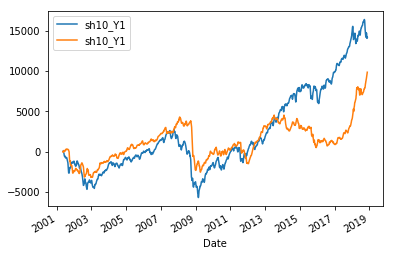

In [66]:
i = 10
t = pd.concat((sp500_label['sh{}_Y1'.format(i)], 
    result['sh{}_Y1'.format(i)]),axis=1)
t.dropna().cumsum().plot()